In [1]:
import pandas as pd
import numpy as np
import os
import glob
import datetime

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import tensorflow

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, Input
from sklearn import preprocessing

import tensorflow as tf
import tensorflow

import numpy as np
import os
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime
from os.path import isfile, join
from sys import getsizeof
import glob

from random import *

import matplotlib.pyplot as plt

import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



ModuleNotFoundError: No module named 'tensorflow.compat.v1'

Using all the data, using a previous model to predict the auroral regions

In [2]:

file_load_df_cumulative = '../ParticlePrecipitation/ML_DB_subsamp_ext_full_dfCumulative_complexHemisphereCombine.csv'
DMSP_DATA_DIR=''
df_cumulative = pd.read_csv(os.path.join(DMSP_DATA_DIR,file_load_df_cumulative))
df_cumulative = df_cumulative.sort_values(by=['ID_SC', 'Datetimes'])
df_cumulative = df_cumulative.set_index('Datetimes')
df_cumulative.index = pd.to_datetime(df_cumulative.index)

cols_to_drop_validation = [c for c in df_cumulative.columns if ('STD' in c) | ('AVG' in c) | ('SC_AACGM_LTIME'==c)]
# cols_to_drop_validation = [c for c in df.columns if ('1min' in c) | ('3min' in c) | ('4min' in c) | ('5min' in c) | ('15min' in c) | ('newell' in c) | ('STD' in c) | ('AVG' in c) | ('SC_AACGM_LTIME'==c)]

df_cumulative = df_cumulative.drop(columns=cols_to_drop_validation)

# Separate training and testing data
mask_val = [(df_cumulative.index.year == 2010) & (df_cumulative['ID_SC'].values==16)]
df_val = df_cumulative[mask_val[0]].copy(deep=True)
df_train = df_cumulative.copy(deep=True).drop( df_cumulative.index[mask_val[0]])

# mask_for_2010_to_2014 = [(df_train.index.year == 2010) | (df_train.index.year == 2011)
#                          | (df_train.index.year == 2012) |(df_train.index.year == 2013)
#                          | (df_train.index.year == 2014)]
# df_train = df_train[mask_for_2010_to_2014[0]]
df_train = df_train.sort_values(by=['ID_SC', 'Datetimes'])
df_val = df_val.sort_values(by=['ID_SC', 'Datetimes'])

# Construct X and y
feature_cols = [c for c in df_train.columns if not 'ELE' in c]
#print( (feature_cols))
#print(df_cumulative.columns)
X_val = df_val[feature_cols].copy(deep=True)
y_val = df_val['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train[feature_cols].copy(deep=True)
y_train = df_train['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

numFeatures = len(X_train.columns.to_list())
feature_labels = X_train.columns.to_list()
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))
X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)

In [3]:
y_val[y_val == 0] = 0.0001
y_train_log1 = np.log10(y_train.copy(deep=True))
y_val_log1 = np.log10(y_val.copy(deep=True))

y_train_log = np.zeros((y_train_log1.values.shape[0],3))
y_val_log = np.zeros((y_val_log1.values.shape[0],3))

for i in range(0,X_val.values.shape[0]):
        y_val_log[i,0]=y_val_log1.values[i]-11.
        y_val_log[i,1]=y_val_log1.values[i]-7.5
        y_val_log[i,2]=y_val_log1.values[i]-10.
for i in range(0,X_train.values.shape[0]):
        y_train_log[i,0]=y_train_log1.values[i]-11.
        y_train_log[i,1]=y_train_log1.values[i]-7.5
        y_train_log[i,2]=y_train_log1.values[i]-10.


scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)

In [4]:



filename = 'best_auroral_region_predictor'

model = tensorflow.keras.models.load_model(filename)

## Can also load it this way:
# model = Sequential()

# model.add(Dense(int(256), activation='relu'))
# model.add(Dropout(.5))

# model.add(Dense(64, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(3,activation='softmax'))

# #compile model using accuracy to measure model performance
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer='adam',  metrics=['accuracy'])

# # model.load_weights('best_auroral_region_predictor_weights.h5')


results_aurora = (model.predict_classes(X))
results_aurora_val = (model.predict_classes(X_test))

W0909 11:15:28.251718 140412516140864 deprecation.py:323] From <ipython-input-4-6bfd44b8242f>:21: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


(1838283,)
(1838283, 1)


(1838283, 3)

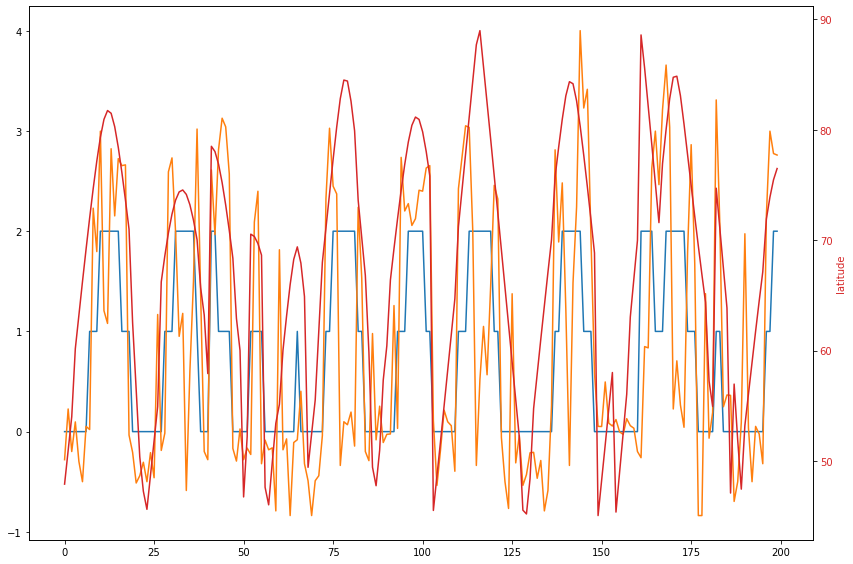

In [5]:

map_aep=[1,0,2] 
a_type = np.zeros((results_aurora_val.shape[0]))
for i in range(0,results_aurora_val.shape[0]):
    a_type[i]=map_aep[results_aurora_val[i]]
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(a_type[:200])
ax1.plot(y_val_log1.values[:200]-7.5)
ax2=plt.twinx()

color = 'tab:red'
ax2.set_ylabel('latitude', color=color)  # we already handled the x-label with ax1
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax2.plot(df_val['SC_AACGM_LAT'].values[:200],color=color)
ax2.tick_params(axis='y', labelcolor=color)

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = label_encoder.fit_transform(results_aurora)
print(integer_encoded.shape)

integer_encoded_train = integer_encoded.reshape(len(results_aurora), 1)
print(integer_encoded_train.shape)

y_train_aurora_type_encoded = onehot_encoder.fit_transform(integer_encoded_train)

integer_encoded = label_encoder.fit_transform(results_aurora_val)
integer_encoded_val = integer_encoded.reshape(len(integer_encoded), 1)
y_val_aurora_type_encoded = onehot_encoder.fit_transform(integer_encoded_val)
y_train_aurora_type_encoded.shape


In [8]:

os.system('source ~/Downloads/cdf37_1-dist/src/definitions/definitions.K')
os.environ["CDF_LIB"] = '/home/jackalak/Downloads/cdf37_1-dist/lib'
from ovationpyme.ovation_plotting import latlt2polar,polar2dial,pcolor_flux
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ovationpyme.ovation_prime import FluxEstimator,AverageEnergyEstimator,BinCorrector
from ovationpyme.ovation_utilities import calc_avg_solarwind
from ovationpyme.ovation_plotting import latlt2polar,polar2dial,pcolor_flux
import ipywidgets
from collections import OrderedDict
from functools import partial

os.system('source ~/Downloads/cdf37_1-dist/src/definitions/definitions.K')
os.environ["CDF_LIB"] = '/home/jackalak/Downloads/cdf37_1-dist/lib'
from ovationpyme.ovation_plotting import latlt2polar,polar2dial,pcolor_flux
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ovationpyme.ovation_prime import FluxEstimator,AverageEnergyEstimator,BinCorrector
from ovationpyme.ovation_utilities import calc_avg_solarwind
from ovationpyme.ovation_plotting import latlt2polar,polar2dial,pcolor_flux
import ipywidgets
from collections import OrderedDict
from functools import partial

def compare_ovation(model, datetime, X_model_in, scaler_X_all):    

    mlatgridN = np.linspace(45,90,num=100)
    mltgridN =  np.linspace(0,24,num=100)

    model_input = np.zeros((mlatgridN.shape[0], mltgridN.shape[0],148))
    flux = np.zeros((mlatgridN.shape[0], mltgridN.shape[0]))
    AEP_class = np.zeros((mlatgridN.shape[0], mltgridN.shape[0]))
 
    for i in range(0,mlatgridN.shape[0]):
        for j in range(0,mltgridN.shape[0]):        
            #calc cos and sin
            rads = mltgridN[j]*15*3.14159/180.
            model_input[i,j,:]=X_model_in
            model_input[i,j,7]=np.cos(rads)
            model_input[i,j,6]=np.sin(rads)
            model_input[i,j,0]=mlatgridN[i]

   
    for i in range(0,mlatgridN.shape[0]):
        for j in range(0,mlatgridN.shape[0]):
        # scale input
            shaped = np.reshape(model_input[i,j,:],(1,148))
            X_val_scaled = scaler_X_all.transform(shaped)
            #get auroral region and flux
            results = model.predict(X_val_scaled)
            map1 = [11,7.5,10]
            AEP_map = [1,0,2]
            classes = np.argmax(results[:,0:3],axis = 1)           
            flux[i,j] = results[0,3+classes[0]]+ map1[classes[0]]
            AEP_class[i,j] = AEP_map[classes[0]]

    # #Here's how you go back to LTIME from sin and cos of LTIME: np.degrees( np.arctan2(sin_LTIME,cos_LTIME) ) / 15.


    f = plt.figure(figsize=(12,6),dpi=150)
    axN = f.add_subplot(121,projection='polar')
    pcolor_kwargs = {'cmap':'gnuplot'}
    mappableN = pcolor_flux(axN,mlatgridN,mltgridN, AEP_class ,'N',**pcolor_kwargs)
    f.colorbar(mappableN,ax=axN,label='Auroral Region Class')
    axN.set_title('Equatorial(0), Auroral(1), or Polar(2) Class')
    polar2dial(axN)
    f.suptitle('')
    plt.show()

    mlatgridN = np.linspace(45,90,num=100)
    mltgridN =  np.linspace(0,24,num=100)        
    f = plt.figure(figsize=(12,6),dpi=150)
    axN = f.add_subplot(121,projection='polar')
    pcolor_kwargs = {'cmap':'gnuplot'}
    mappableN = pcolor_flux(axN,mlatgridN,mltgridN,(10**flux)*(1.60218e-12),'N',**pcolor_kwargs)
    f.colorbar(mappableN,ax=axN,label='Total Flux')
    axN.set_title('ML Energy Flux')
    polar2dial(axN)
    f.suptitle('')
    plt.show()

    dt = datetime
    print(dt)
    auroral_types = ['diff','mono','wave','ions']
    f = plt.figure(figsize=(12,6),dpi=150)
    axN = f.add_subplot(121,projection='polar')
    # axS = f.add_subplot(122,projection='polar')
    for i in range(0,3):
        atype = auroral_types[i]
        jtype ="energy"
        bincorrect = True
        combine_hemispheres = True
        dtstr = dt.strftime('%Y%m%d %H:%M')
        if jtype=='average energy':
            estimator = AverageEnergyEstimator(atype)
            get_precip_for_time = estimator.get_eavg_for_time
        else:
            estimator = FluxEstimator(atype,jtype)
            get_precip_for_time = estimator.get_flux_for_time


        tflux_kwargs = {'combine_hemispheres':combine_hemispheres,
                        'return_dF':True}
        fluxtupleN = get_precip_for_time(dt,hemi='N',**tflux_kwargs)
        mlatgridN,mltgridN,fluxgridN,newell_coupling = fluxtupleN
        fluxtupleS = get_precip_for_time(dt,hemi='S',**tflux_kwargs)
        mlatgridS,mltgridS,fluxgridS,newell_coupling = fluxtupleS

        if bincorrect:
            bcN = BinCorrector(mlatgridN,mltgridN)
            fluxgridN = bcN.fix(fluxgridN)
            bcS = BinCorrector(mlatgridS,mltgridS)
            fluxgridS = bcS.fix(fluxgridS)
            print("Correction Applied")

        if i == 0:
            fluxgridN_sum = fluxgridN
            fluxgridS_sum = fluxgridS
        else:
            fluxgridN_sum = fluxgridN_sum+fluxgridN
            fluxgridS_sum = fluxgridN_sum+fluxgridS


    mappableN = pcolor_flux(axN,mlatgridN,mltgridN,fluxgridN_sum,'N',**pcolor_kwargs)
    # mappableS = pcolor_flux(axS,mlatgridS,mltgridS,fluxgridS_sum,'S',**pcolor_kwargs)
    f.colorbar(mappableN,ax=axN,label=jtype)
    # f.colorbar(mappableS,ax=axS,label=jtype)
    axN.set_title('Ovation Energy Flux')
    # axS.set_title('Southern Hemisphere')
    polar2dial(axN)
    # polar2dial(axS)
    f.suptitle(('Total Electron Flux'+'\nNewell Coupling (%s): %f' % (dtstr,newell_coupling)))
    plt.show()

def compare_ovation_logEvScale(model, datetime, X_model_in, scaler_X_all):    

    mlatgridN = np.linspace(45,90,num=100)
    mltgridN =  np.linspace(0,24,num=100)

    model_input = np.zeros((mlatgridN.shape[0], mltgridN.shape[0],148))
    flux = np.zeros((mlatgridN.shape[0], mltgridN.shape[0]))
    AEP_class = np.zeros((mlatgridN.shape[0], mltgridN.shape[0]))
 
    for i in range(0,mlatgridN.shape[0]):
        for j in range(0,mltgridN.shape[0]):        
            #calc cos and sin
            rads = mltgridN[j]*15*3.14159/180.
            model_input[i,j,:]=X_model_in
            model_input[i,j,7]=np.cos(rads)
            model_input[i,j,6]=np.sin(rads)
            model_input[i,j,0]=mlatgridN[i]

   
    for i in range(0,mlatgridN.shape[0]):
        for j in range(0,mlatgridN.shape[0]):
        # scale input
            shaped = np.reshape(model_input[i,j,:],(1,148))
            X_val_scaled = scaler_X_all.transform(shaped)
            #get auroral region and flux
            results = model.predict(X_val_scaled)
            map1 = [11,7.5,10]
            AEP_map = [1,0,2]
            classes = np.argmax(results[:,0:3],axis = 1)           
            flux[i,j] = results[0,3+classes[0]]+ map1[classes[0]]
            AEP_class[i,j] = AEP_map[classes[0]]

    # #Here's how you go back to LTIME from sin and cos of LTIME: np.degrees( np.arctan2(sin_LTIME,cos_LTIME) ) / 15.


    f = plt.figure(figsize=(12,6),dpi=150)
    axN = f.add_subplot(121,projection='polar')
    pcolor_kwargs = {'cmap':'gnuplot'}
    mappableN = pcolor_flux(axN,mlatgridN,mltgridN, AEP_class ,'N',**pcolor_kwargs)
    f.colorbar(mappableN,ax=axN,label='Auroral Region Class')
    axN.set_title('Equatorial(0), Auroral(1), or Polar(2) Class')
    polar2dial(axN)
    f.suptitle('')
    plt.show()

    mlatgridN = np.linspace(45,90,num=100)
    mltgridN =  np.linspace(0,24,num=100)        
    f = plt.figure(figsize=(12,6),dpi=150)
    axN = f.add_subplot(121,projection='polar')
    pcolor_kwargs = {'cmap':'gnuplot'}
    mappableN = pcolor_flux(axN,mlatgridN,mltgridN,flux,'N',**pcolor_kwargs)
    f.colorbar(mappableN,ax=axN,label='Total Flux')
    axN.set_title('ML Energy Flux')
    polar2dial(axN)
    f.suptitle('')
    plt.show()

    dt = datetime
    print(dt)
    auroral_types = ['diff','mono','wave','ions']
    f = plt.figure(figsize=(12,6),dpi=150)
    axN = f.add_subplot(121,projection='polar')
    # axS = f.add_subplot(122,projection='polar')
    for i in range(0,3):
        atype = auroral_types[i]
        jtype ="energy"
        bincorrect = True
        combine_hemispheres = True
        dtstr = dt.strftime('%Y%m%d %H:%M')
        if jtype=='average energy':
            estimator = AverageEnergyEstimator(atype)
            get_precip_for_time = estimator.get_eavg_for_time
        else:
            estimator = FluxEstimator(atype,jtype)
            get_precip_for_time = estimator.get_flux_for_time


        tflux_kwargs = {'combine_hemispheres':combine_hemispheres,
                        'return_dF':True}
        fluxtupleN = get_precip_for_time(dt,hemi='N',**tflux_kwargs)
        mlatgridN,mltgridN,fluxgridN,newell_coupling = fluxtupleN
        fluxtupleS = get_precip_for_time(dt,hemi='S',**tflux_kwargs)
        mlatgridS,mltgridS,fluxgridS,newell_coupling = fluxtupleS

        if bincorrect:
            bcN = BinCorrector(mlatgridN,mltgridN)
            fluxgridN = bcN.fix(fluxgridN)
            bcS = BinCorrector(mlatgridS,mltgridS)
            fluxgridS = bcS.fix(fluxgridS)
            print("Correction Applied")

        if i == 0:
            fluxgridN_sum = fluxgridN
            fluxgridS_sum = fluxgridS
        else:
            fluxgridN_sum = fluxgridN_sum+fluxgridN
            fluxgridS_sum = fluxgridN_sum+fluxgridS


    mappableN = pcolor_flux(axN,mlatgridN,mltgridN,np.log10(fluxgridN_sum/1.60218e-12),'N',**pcolor_kwargs)
    # mappableS = pcolor_flux(axS,mlatgridS,mltgridS,fluxgridS_sum,'S',**pcolor_kwargs)
    f.colorbar(mappableN,ax=axN,label=jtype)
    # f.colorbar(mappableS,ax=axS,label=jtype)
    axN.set_title('Ovation Energy Flux')
    # axS.set_title('Southern Hemisphere')
    polar2dial(axN)
    # polar2dial(axS)
    f.suptitle(('Total Electron Flux'+'\nNewell Coupling (%s): %f' % (dtstr,newell_coupling)))
    plt.show()

def plots(model, X, y_train_log1, y_train_aurora_type_encoded, X_test, y_val_log1, y_val_aurora_type_encoded,) :   
    map1 = [11,7.5,10]
    results = model.predict([X_test[:,:148]])#, y_val_log.values)#, batch_size=128)
    classes = np.argmax(results[:,0:3],axis = 1)
    classes_true = np.argmax(y_val_aurora_type_encoded,axis=1)
    results[:,0+3] = results[:,0+3] + map1[0]
    results[:,1+3] = results[:,1+3] + map1[1]
    results[:,2+3] = results[:,2+3] + map1[2]

    result_val = np.zeros((y_val_log1.shape[0]))
    for i in range(0,y_val_log1.shape[0]):
        result_val[i] = results[i,3+classes[i]]
    df_results = pd.DataFrame(data=result_val, index = X_val.index)
    y = pd.DataFrame(data=y_val_log1, index = X_val.index)

    bin_total = np.zeros((200))
    bin_error_total = np.zeros((200))
    for j in range(0,y_val_log1.values.shape[0]):
        i = int((y_val_log1.values[j]-6)/((14-6)/200))
        if i < 200:
            bin_total[i] = bin_total[i]+1
            bin_error_total[i] = bin_error_total[i] + np.abs(y_val_log1.values[j]-result_val[j])

    avg_error_over_hist = bin_error_total/bin_total
    plt.figure()
    plt.plot(avg_error_over_hist)
    plt.title('Average Validation Error over Hist Bins')
    plt.show()


    df_results1 = pd.DataFrame(data=results, index = X_val.index)


    plt.figure()
    plt.title('Validation Dataset')
    plt.hist(10**y.values*1.6e-12,bins=100, log=True,range=(0,26),alpha=0.5)
    plt.hist(10**df_results.values*1.6e-12,bins=100, log=True,range=(0,26),alpha=0.5)
    plt.legend(['val', 'result'], loc='upper right')
    plt.show()


    plt.figure()
    plt.title('Validation Dataset')
    plt.hist(y.values,bins=200,range=(6,14),alpha=.5)
    plt.hist(df_results.values,bins=200,range=(6,14),alpha=0.5)
    plt.legend(['val', 'result'], loc='upper left')
    plt.show()

    plt.figure(figsize=(12,4))
    plt.plot(y[:500])
    plt.plot(df_results[:500])
    plt.legend(['val', 'result'], loc='upper left')
    plt.show()

    plt.figure(figsize=(12,4))
    plt.plot(y[:5000])
    plt.plot(df_results[:5000])
    plt.legend(['val', 'result'], loc='upper left')
    plt.show()

    plt.figure(figsize=(12,4))
    plt.plot(y[:])
    plt.plot(df_results[:])
    plt.legend(['val', 'result'], loc='upper left')
    plt.show()

    plt.figure(figsize=(12,4))
    plt.plot(y[-500:])
    plt.plot(df_results[-500:])
    plt.legend(['val', 'result'], loc='upper left')
    plt.show()

    plt.figure(figsize=(12,4))
    plt.plot(10**y[:]*1.6e-12)
    plt.plot(10**df_results[:]*1.6e-12)
    plt.legend(['val', 'result'], loc='upper left')
    plt.show()


    plt.figure()
    plt.title('Auroral region')
    plt.hist(y_val_log[:,0],bins=200,alpha=.5,range=(-5,5))
    plt.hist(df_results1.values[:,0+3]-map1[0],bins=200,alpha=0.5,range=(-5,5))
    plt.ylim([0,2500])
    plt.legend(['val', 'result'], loc='upper left')
    plt.show()
    plt.figure()
    plt.title('Equatorial region')
    plt.hist(y_val_log[:,1],bins=200,alpha=.5,range=(-5,5))
    plt.hist(df_results1.values[:,1+3]-map1[1],bins=200,alpha=0.5,range=(-5,5))
    plt.ylim([0,2500])
    plt.legend(['val', 'result'], loc='upper left')
    plt.show()
    plt.figure()
    plt.title('Polar region')
    plt.hist(y_val_log[:,2],bins=200,alpha=.5,range=(-5,5))
    plt.hist(df_results1.values[:,2+3]-map1[2],bins=200,alpha=0.5,range=(-5,5))
    plt.ylim([0,2500])
    plt.legend(['val', 'result'], loc='upper left')
    plt.show()
    plt.figure()

    for j in range(0,3):
        region=[]
        for i in range( 0,classes.shape[0]):
            if (classes[i]==j):
                region.append(abs(y_val_log1[i]-df_results1.values[i,j+3]))
        print('Region ' + str(j) + ' MAE: ' + str(np.mean(region)))        

    plt.title('Auroral region')
    plt.hist(y_val_log[:,0]*(classes_true[:]==0),bins=200,alpha=.5,range=(-5,5))
    plt.hist((df_results1.values[:,0+3]-map1[0])*(classes[:]==0),bins=200,alpha=0.5,range=(-5,5))
    plt.ylim([0,2500])
    plt.legend(['val', 'result'], loc='upper left')
    plt.show()
    plt.figure()
    plt.title('Equatorial region')
    plt.hist(y_val_log[:,1]*(classes_true[:]==1),bins=200,alpha=.5,range=(-5,5))
    plt.hist((df_results1.values[:,1+3]-map1[1])*(classes[:]==1),bins=200,alpha=0.5,range=(-5,5))
    plt.ylim([0,2500])
    plt.legend(['val', 'result'], loc='upper left')
    plt.show()
    plt.figure()
    plt.title('Polar region')
    plt.hist(y_val_log[:,2]*(classes_true[:]==2),bins=200,alpha=.5,range=(-5,5))
    plt.hist((df_results1.values[:,2+3]-map1[2])*(classes[:]==2),bins=200,alpha=0.5,range=(-5,5))
    plt.ylim([0,2500])
    plt.legend(['val', 'result'], loc='upper left')
    plt.show()
    results = model.predict([X[:,:148]])#, y_val_log.values)#, batch_size=128)
    classes = np.argmax(results[:,0:3],axis = 1)

    results[:,0+3] = results[:,0+3] + map1[0]
    results[:,1+3] = results[:,1+3] + map1[1]
    results[:,2+3] = results[:,2+3] + map1[2]

    result_val = np.zeros((y_train_log1.shape[0]))
    for i in range(0,y_train_log1.shape[0]):
        result_val[i] = results[i,3+classes[i]]
    df_results = pd.DataFrame(data=result_val, index = X_train.index)
    y = pd.DataFrame(data=y_train_log1, index = X_train.index)

    bin_total = np.zeros((200))
    bin_error_total = np.zeros((200))
    for j in range(0,y_train_log1.values.shape[0]):
        i = int((y_train_log1.values[j]-6)/((14-6)/200))
        if i < 200:
            bin_total[i] = bin_total[i]+1
            bin_error_total[i] = bin_error_total[i] + np.abs(y_train_log1.values[j]-result_val[j])

    avg_error_over_hist = bin_error_total/bin_total
    plt.figure()
    plt.plot(avg_error_over_hist)
    plt.title('Average train Error over Hist Bins')
    plt.show()


    df_results = pd.DataFrame(data=result_val, index = df_train.index)


    plt.figure()
    plt.title('train Dataset')
    plt.hist(10**y.values*1.6e-12,bins=100, log=True,range=(0,26),alpha=0.5)
    plt.hist(10**df_results.values*1.6e-12,bins=100, log=True,range=(0,26),alpha=0.5)
    plt.legend(['train', 'result'], loc='upper right')
    plt.show()


    plt.figure()
    plt.title('train Dataset')
    plt.hist(y.values,bins=200,range=(6,14),alpha=.5)
    plt.hist(df_results.values,bins=200,range=(6,14),alpha=0.5)
    plt.legend(['train', 'result'], loc='upper left')
    plt.show()
    

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/geospacepy-0.1.0-py3.6.egg/geospacepy/__init__.py", line 8, in <module>
    from geospacepy.geospacepy_config import config
ModuleNotFoundError: No module named 'geospacepy.geospacepy_config'

Solar wind data files will be saved to /home/jackalak/.local/share/geospacepy


# custom loss function and a call back to do plotting and metrics while training

In [9]:
import keras.backend as K

def custom_mse(y_true, y_pred):
 
    loss = K.mean(K.square(y_true[:,3:6]*y_true[:,0:3] - y_pred[:,3:6]*K.one_hot(K.argmax(y_pred[:,0:3]),3)))  # (batch_size, 2)
    
    return loss+ tf.losses.categorical_crossentropy(y_true[:,0:3], y_pred[:,0:3])

class Hist_avg_error(tf.keras.callbacks.Callback):
    def __init__(self,   validation_data):
        self.validation_data = validation_data
        x_val, y_true = self.validation_data

        self.classes_true = np.argmax(y_true[:,0:3],axis = 1)

        map1 = [11,7.5,10]


        y_true[:,0+3] = y_true[:,0+3] + map1[0]
        y_true[:,1+3] = y_true[:,1+3] + map1[1]
        y_true[:,2+3] = y_true[:,2+3] + map1[2]

        result_pred = np.zeros((y_true.shape[0]))
        self.result_val = np.zeros((y_true.shape[0]))

        for i in range(0,y_true.shape[0]):
            self.result_val[i] = y_true[i,3+self.classes_true[i]]     

    def eval_map(self):
        x_val, y_true = self.validation_data
        y_pred = self.model.predict(x_val)

        classes_pred = np.argmax(y_pred[:,0:3],axis = 1)
        
        precent_correct = 100.*sum(a == b for a,b in zip(self.classes_true.tolist(), classes_pred.tolist())) / classes_pred.shape[0]
        
        map1 = [11,7.5,10]
        y_pred[:,0+3] = y_pred[:,0+3] + map1[0]
        y_pred[:,1+3] = y_pred[:,1+3] + map1[1]
        y_pred[:,2+3] = y_pred[:,2+3] + map1[2]

        result_pred = np.zeros((y_pred.shape[0]))

        for i in range(0,y_pred.shape[0]):
            result_pred[i] = y_pred[i,3+classes_pred[i]]
        errors = np.abs(result_pred-self.result_val)
        
        bin_total = np.ones((100))
        bin_error_total = np.zeros((100))
        for j in range(0,self.result_val.shape[0]):
            i = int((self.result_val[j]-7)/((12.75-7)/100))
            if i < 100 and i >= 0:
                bin_total[i] = bin_total[i]+1
                bin_error_total[i] = bin_error_total[i] + errors[j]

        avg_error_over_hist = bin_error_total/bin_total
        
        x_scale = 7 + (np.linspace(0, 99, 100))*(12.75-7)/100.
        fig, axs = plt.subplots(1,2,figsize=(12,4))
        axs[0].plot(x_scale,avg_error_over_hist)
        axs[0].set_title('Average Validation Error over Hist Bins')
        axs[0].set_ylim([0.,2.5])
      
        axs[1].set_title('Validation Dataset')
        axs[1].hist(self.result_val,bins=200,range=(6,13.),alpha=.5)
        axs[1].hist(result_pred,bins=200,range=(6,13.),alpha=0.5)
        axs[1].set_ylim([0,2000])
        axs[1].legend(['val', 'result'], loc='upper right')
        plt.show()
        
        print("Hist_avg_error: %f"%(np.mean(avg_error_over_hist))
              + ", Hist_avg_error_regions: "+str(np.mean(avg_error_over_hist[0:int(1/6*100) ]))
            + ', ' + str(np.mean(avg_error_over_hist[int(1/6*100):int(2.5/6*100)]))  
            + ', ' + str(np.mean(avg_error_over_hist[int(2.5/6*100):]) )  
           + ", Hist_avg_right_tail: "+str(np.mean(avg_error_over_hist[int(5/6*100):])) )
        print('MSE: ' + str(np.mean(errors*errors))
             + ', MAE: ' + str(np.mean(errors)) 
             + ', Accuracy: ' + str(precent_correct) )        
        
        #return np.mean(avg_error_over_hist)

    def on_epoch_end(self, epoch, logs={}):
          if ((epoch < 10) or (epoch%10 ==0)):
                self.eval_map()
                print("Epoch: " + str(epoch))
        

metrics_callback = Hist_avg_error(validation_data=(
                 X_test[:,:148],  np.concatenate((y_val_aurora_type_encoded, y_val_log),axis=1)))

# this first example has no dropout, later a dropout model is used

In [10]:
from tensorflow.keras.layers import Input

input1 = Input(shape=(148))
model1 = Dense(64,  activation='relu')(input1)
model1 = Dense(32, activation='relu')(model1)
model1 = Dense(int(256),   activation='relu')(model1)
model1 = Dense(int(1024),  activation='relu')(model1)
model1 = Dense(int(1024),  activation='relu')(model1)
model1 = Dense(int(256),  activation='relu')(model1)
model1 = Dense(32, activation='relu')(model1)

output1 = Dense(3, activation='softmax',name="class_output")(model1)
output2 = Dense(3,  name="residual")(model1)
output = tensorflow.keras.layers.concatenate([output1,output2])
model = tensorflow.keras.models.Model(inputs=input1, outputs=output)
#compile model using accuracy to measure model performance
model.compile(loss=custom_mse, optimizer='adam')
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 148)]        0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 64)           9536        input_2[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 32)           2080        dense_7[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 256)          8448        dense_8[0][0]                    
____________________________________________________________________________________________

Epoch 1/101


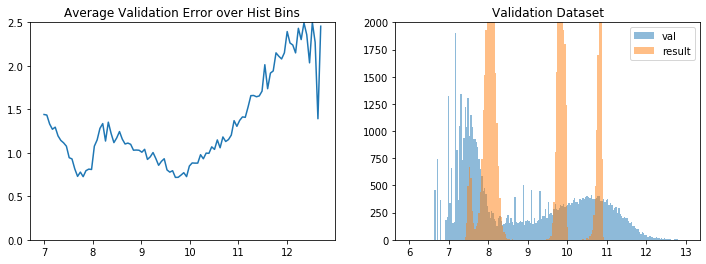

Hist_avg_error: 1.313767, Hist_avg_error_regions: 1.063741944596632, 1.0852073679337348, 1.4784181004239114, Hist_avg_right_tail: 2.2220772281787635
MSE: 2.172322770185133, MAE: 1.1297287763644297, Accuracy: 71.72251403731208
Epoch: 0
57/57 - 7s - loss: 1.2826 - val_loss: 1.0654
Epoch 2/101


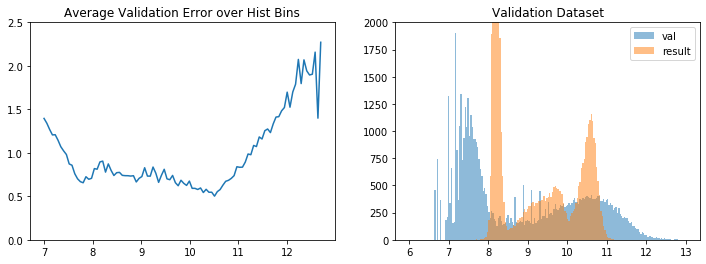

Hist_avg_error: 0.980245, Hist_avg_error_regions: 0.9923412217945305, 0.7698480504336749, 1.0661159362499368, Hist_avg_right_tail: 1.7675216592921064
MSE: 1.2538182666114668, MAE: 0.8953978444893583, Accuracy: 85.90472740445571
Epoch: 1
57/57 - 7s - loss: 0.7552 - val_loss: 0.6753
Epoch 3/101


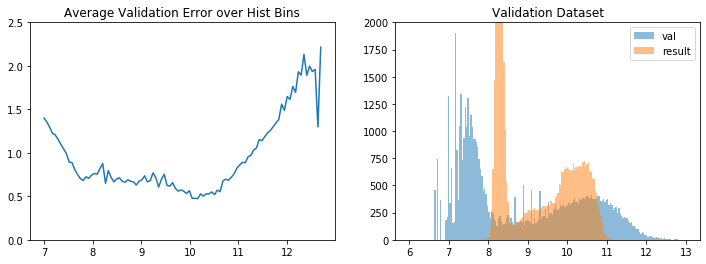

Hist_avg_error: 0.951143, Hist_avg_error_regions: 1.0139935821461503, 0.7128825088475759, 1.0350560052786382, Hist_avg_right_tail: 1.749910533284656
MSE: 1.1444603608819834, MAE: 0.883121712075992, Accuracy: 89.61601159210288
Epoch: 2
57/57 - 6s - loss: 0.5350 - val_loss: 0.6071
Epoch 4/101


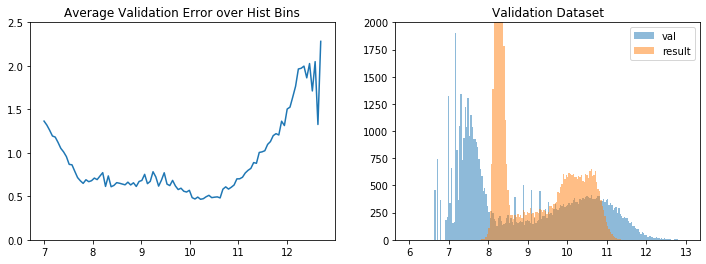

Hist_avg_error: 0.899187, Hist_avg_error_regions: 0.9817218449982802, 0.6763453749262871, 0.9712294504184746, Hist_avg_right_tail: 1.689867847596599
MSE: 1.036131502799208, MAE: 0.8383855778118376, Accuracy: 91.64825212823764
Epoch: 3
57/57 - 6s - loss: 0.4589 - val_loss: 0.5372
Epoch 5/101


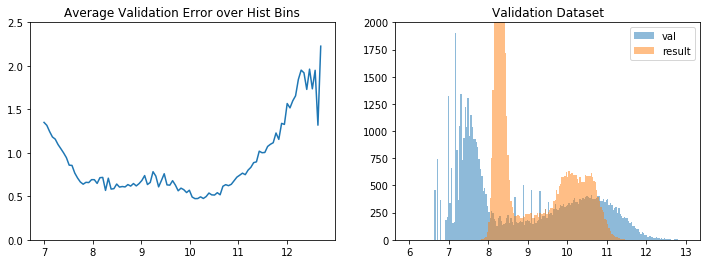

Hist_avg_error: 0.888397, Hist_avg_error_regions: 0.9683477419004364, 0.6572516952133735, 0.9646580472639101, Hist_avg_right_tail: 1.6482332900447656
MSE: 1.0030338041188533, MAE: 0.8335519748509087, Accuracy: 92.46513312805651
Epoch: 4
57/57 - 7s - loss: 0.4143 - val_loss: 0.5193
Epoch 6/101


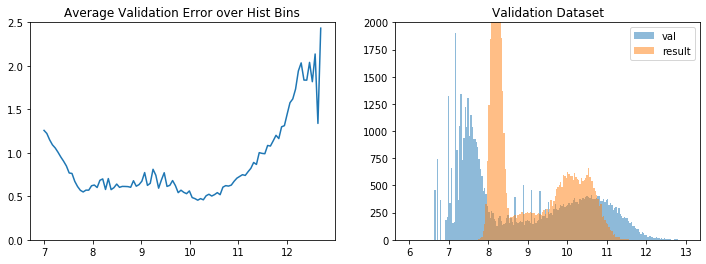

Hist_avg_error: 0.874449, Hist_avg_error_regions: 0.8746697820529692, 0.6462734738708407, 0.9710734720784191, Hist_avg_right_tail: 1.692044537714366
MSE: 0.9158848661664442, MAE: 0.7861495608750705, Accuracy: 93.67505886614744
Epoch: 5
57/57 - 7s - loss: 0.3931 - val_loss: 0.4654
Epoch 7/101


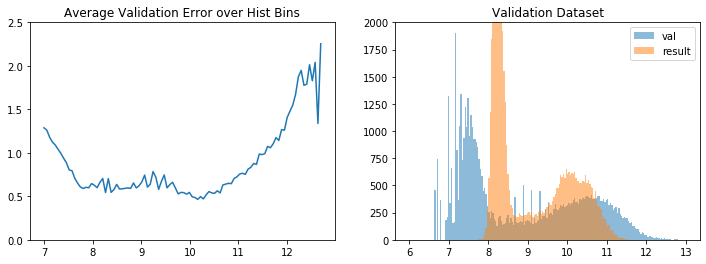

Hist_avg_error: 0.868763, Hist_avg_error_regions: 0.9099921034258494, 0.6329236947380165, 0.9575140773898586, Hist_avg_right_tail: 1.6360008518356413
MSE: 0.9317875629922253, MAE: 0.8020335828813696, Accuracy: 94.10251765984422
Epoch: 6
57/57 - 7s - loss: 0.3615 - val_loss: 0.4638
Epoch 8/101


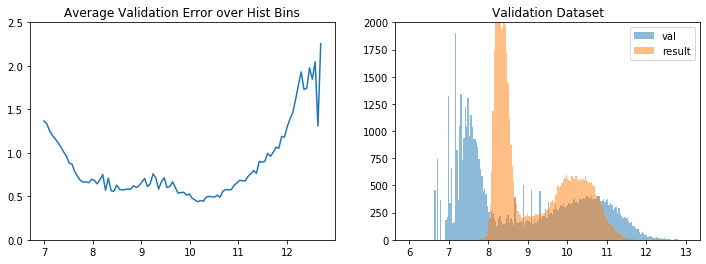

Hist_avg_error: 0.852581, Hist_avg_error_regions: 0.9840687647848618, 0.6393630749338349, 0.9072694971884, Hist_avg_right_tail: 1.5799271025674202
MSE: 0.963780310410426, MAE: 0.8184803943863308, Accuracy: 94.44484694801666
Epoch: 7
57/57 - 7s - loss: 0.3439 - val_loss: 0.4649
Epoch 9/101


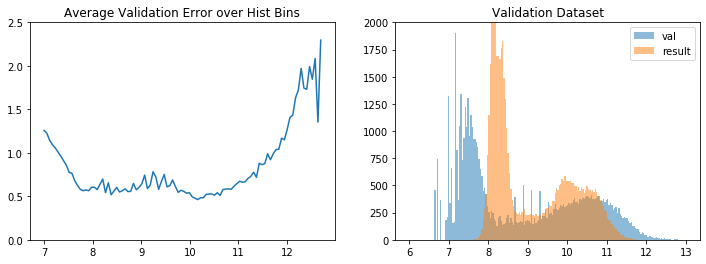

Hist_avg_error: 0.831330, Hist_avg_error_regions: 0.8795465696704301, 0.6125375281445337, 0.9109624463147198, Hist_avg_right_tail: 1.5811277966583273
MSE: 0.8772488458282361, MAE: 0.7698942256148702, Accuracy: 95.15305198333635
Epoch: 8
57/57 - 7s - loss: 0.3353 - val_loss: 0.4208
Epoch 10/101


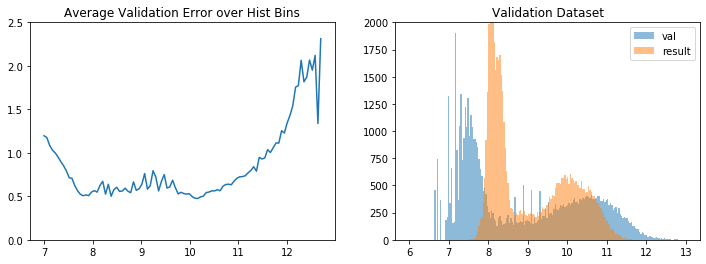

Hist_avg_error: 0.844257, Hist_avg_error_regions: 0.8210696231442656, 0.6025539201623222, 0.9529611332973553, Hist_avg_right_tail: 1.6523066945589875
MSE: 0.8412744131448145, MAE: 0.7534222454820956, Accuracy: 95.45191088570911
Epoch: 9
57/57 - 7s - loss: 0.3202 - val_loss: 0.4039
Epoch 11/101


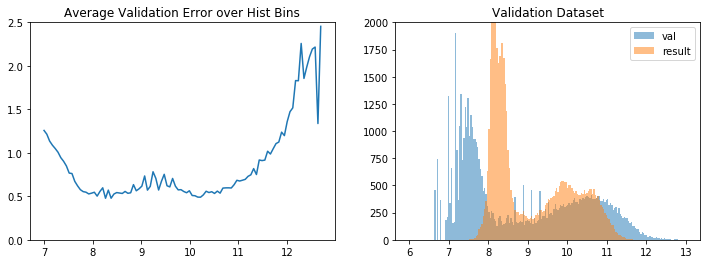

Hist_avg_error: 0.851533, Hist_avg_error_regions: 0.8715776777992166, 0.5749292103389007, 0.9633022967009452, Hist_avg_right_tail: 1.7104021378855447
MSE: 0.8716302346811071, MAE: 0.7694765048124775, Accuracy: 95.24361528708567
Epoch: 10
57/57 - 7s - loss: 0.3137 - val_loss: 0.4183
Epoch 12/101
57/57 - 5s - loss: 0.3037 - val_loss: 0.3988
Epoch 13/101
57/57 - 5s - loss: 0.2964 - val_loss: 0.4085
Epoch 14/101
57/57 - 5s - loss: 0.2934 - val_loss: 0.4548
Epoch 15/101
57/57 - 5s - loss: 0.2895 - val_loss: 0.3900
Epoch 16/101
57/57 - 5s - loss: 0.2818 - val_loss: 0.3962
Epoch 17/101
57/57 - 5s - loss: 0.2764 - val_loss: 0.4161
Epoch 18/101
57/57 - 5s - loss: 0.2744 - val_loss: 0.3779
Epoch 19/101
57/57 - 5s - loss: 0.2708 - val_loss: 0.4079
Epoch 20/101
57/57 - 5s - loss: 0.2660 - val_loss: 0.3648
Epoch 21/101


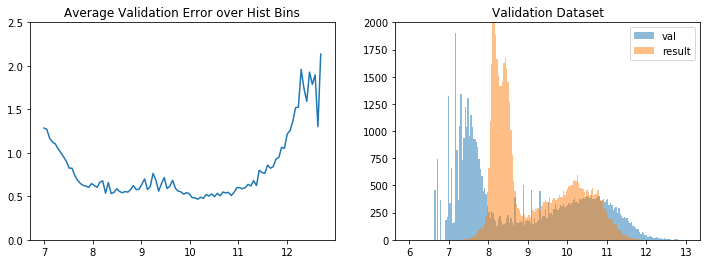

Hist_avg_error: 0.803190, Hist_avg_error_regions: 0.9260863857962434, 0.6085526803620547, 0.8523358525685951, Hist_avg_right_tail: 1.4824254872493627
MSE: 0.8657574037834714, MAE: 0.7742813379380231, Accuracy: 96.65821409165007
Epoch: 20
57/57 - 7s - loss: 0.2644 - val_loss: 0.3846
Epoch 22/101
57/57 - 5s - loss: 0.2639 - val_loss: 0.3746
Epoch 23/101
57/57 - 5s - loss: 0.2597 - val_loss: 0.3983
Epoch 24/101
57/57 - 5s - loss: 0.2563 - val_loss: 0.3506
Epoch 25/101
57/57 - 5s - loss: 0.2550 - val_loss: 0.3484
Epoch 26/101
57/57 - 5s - loss: 0.2539 - val_loss: 0.3641
Epoch 27/101
57/57 - 5s - loss: 0.2534 - val_loss: 0.3727
Epoch 28/101
57/57 - 5s - loss: 0.2495 - val_loss: 0.3589
Epoch 29/101
57/57 - 5s - loss: 0.2470 - val_loss: 0.3495
Epoch 30/101
57/57 - 5s - loss: 0.2459 - val_loss: 0.3575
Epoch 31/101


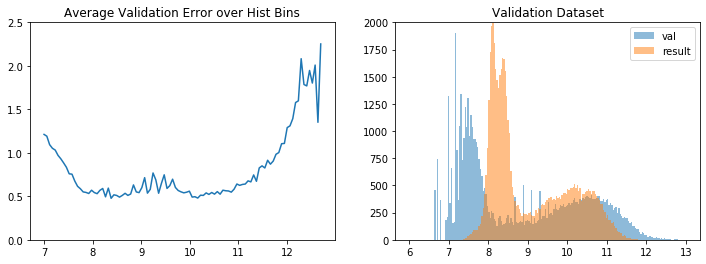

Hist_avg_error: 0.803952, Hist_avg_error_regions: 0.8554998089907152, 0.5645047776216777, 0.8914336231730079, Hist_avg_right_tail: 1.550916461153348
MSE: 0.814176312940264, MAE: 0.7460871297931335, Accuracy: 97.16355732657128
Epoch: 30
57/57 - 7s - loss: 0.2464 - val_loss: 0.3525
Epoch 32/101
57/57 - 5s - loss: 0.2449 - val_loss: 0.3520
Epoch 33/101
57/57 - 5s - loss: 0.2407 - val_loss: 0.3379
Epoch 34/101
57/57 - 5s - loss: 0.2422 - val_loss: 0.3811
Epoch 35/101
57/57 - 5s - loss: 0.2428 - val_loss: 0.3540
Epoch 36/101
57/57 - 5s - loss: 0.2382 - val_loss: 0.3410
Epoch 37/101
57/57 - 5s - loss: 0.2375 - val_loss: 0.3512
Epoch 38/101
57/57 - 5s - loss: 0.2341 - val_loss: 0.3427
Epoch 39/101
57/57 - 5s - loss: 0.2338 - val_loss: 0.3536
Epoch 40/101
57/57 - 5s - loss: 0.2348 - val_loss: 0.3279
Epoch 41/101


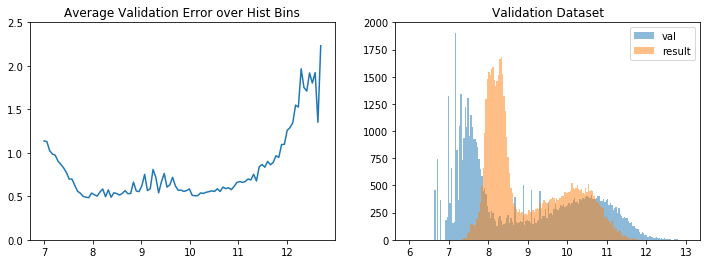

Hist_avg_error: 0.797790, Hist_avg_error_regions: 0.7956450827862822, 0.5725573494597405, 0.8938087657115661, Hist_avg_right_tail: 1.51339474022584
MSE: 0.7808209285796379, MAE: 0.7270144867017398, Accuracy: 97.42981343959427
Epoch: 40
57/57 - 7s - loss: 0.2313 - val_loss: 0.3354
Epoch 42/101
57/57 - 5s - loss: 0.2347 - val_loss: 0.3591
Epoch 43/101
57/57 - 5s - loss: 0.2299 - val_loss: 0.3372
Epoch 44/101
57/57 - 5s - loss: 0.2301 - val_loss: 0.3342
Epoch 45/101
57/57 - 5s - loss: 0.2267 - val_loss: 0.3551
Epoch 46/101
57/57 - 5s - loss: 0.2289 - val_loss: 0.3483
Epoch 47/101
57/57 - 5s - loss: 0.2244 - val_loss: 0.3637
Epoch 48/101
57/57 - 5s - loss: 0.2258 - val_loss: 0.3523
Epoch 49/101
57/57 - 5s - loss: 0.2258 - val_loss: 0.3403
Epoch 50/101
57/57 - 5s - loss: 0.2236 - val_loss: 0.3458
Epoch 51/101


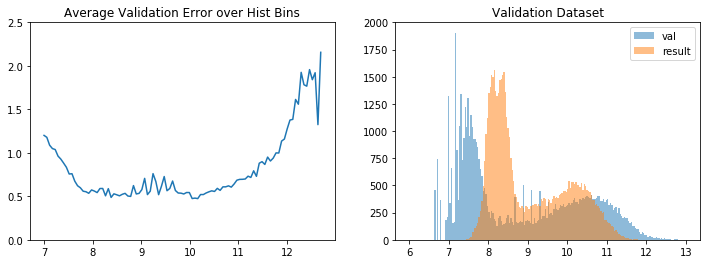

Hist_avg_error: 0.809689, Hist_avg_error_regions: 0.8550129416826615, 0.5624365001443067, 0.9021655247950872, Hist_avg_right_tail: 1.5395695376355383
MSE: 0.8134189873643087, MAE: 0.7524672480666298, Accuracy: 97.37547545734468
Epoch: 50
57/57 - 7s - loss: 0.2209 - val_loss: 0.3508
Epoch 52/101
57/57 - 5s - loss: 0.2209 - val_loss: 0.3286
Epoch 53/101
57/57 - 5s - loss: 0.2192 - val_loss: 0.3408
Epoch 54/101
57/57 - 5s - loss: 0.2210 - val_loss: 0.3506
Epoch 55/101
57/57 - 5s - loss: 0.2171 - val_loss: 0.3338
Epoch 56/101
57/57 - 5s - loss: 0.2176 - val_loss: 0.3185
Epoch 57/101
57/57 - 5s - loss: 0.2180 - val_loss: 0.3288
Epoch 58/101
57/57 - 5s - loss: 0.2174 - val_loss: 0.3189
Epoch 59/101
57/57 - 5s - loss: 0.2150 - val_loss: 0.3356
Epoch 60/101
57/57 - 5s - loss: 0.2132 - val_loss: 0.3303
Epoch 61/101


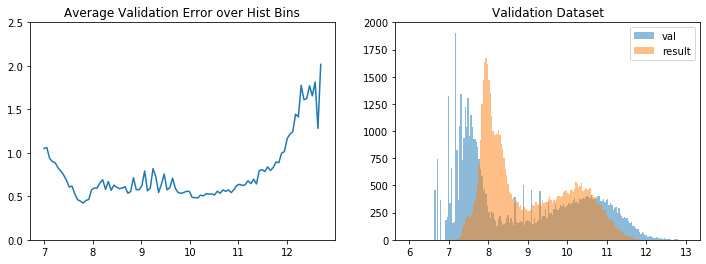

Hist_avg_error: 0.763959, Hist_avg_error_regions: 0.7135300999571847, 0.6193438747691753, 0.8389128898091511, Hist_avg_right_tail: 1.4012419067502047
MSE: 0.7341948640410508, MAE: 0.6841093421213632, Accuracy: 97.03857996739721
Epoch: 60
57/57 - 7s - loss: 0.2136 - val_loss: 0.3309
Epoch 62/101
57/57 - 5s - loss: 0.2117 - val_loss: 0.3106
Epoch 63/101
57/57 - 5s - loss: 0.2108 - val_loss: 0.3251
Epoch 64/101
57/57 - 5s - loss: 0.2091 - val_loss: 0.3356
Epoch 65/101
57/57 - 5s - loss: 0.2099 - val_loss: 0.3065
Epoch 66/101
57/57 - 5s - loss: 0.2071 - val_loss: 0.3124
Epoch 67/101
57/57 - 5s - loss: 0.2095 - val_loss: 0.3127
Epoch 68/101
57/57 - 5s - loss: 0.2094 - val_loss: 0.3167
Epoch 69/101
57/57 - 5s - loss: 0.2029 - val_loss: 0.3049
Epoch 70/101
57/57 - 5s - loss: 0.2039 - val_loss: 0.3100
Epoch 71/101


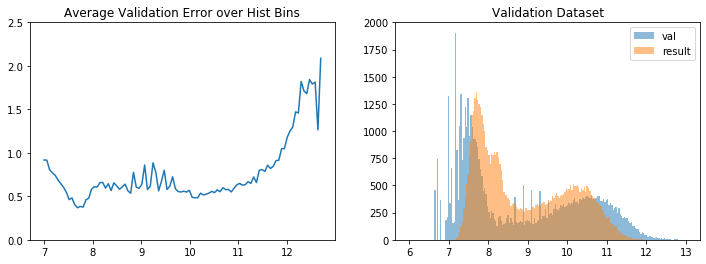

Hist_avg_error: 0.762481, Hist_avg_error_regions: 0.5977326317094651, 0.6372353300369196, 0.860228601442465, Hist_avg_right_tail: 1.446202635769948
MSE: 0.6810325004086332, MAE: 0.6372347113726647, Accuracy: 97.68701322224234
Epoch: 70
57/57 - 7s - loss: 0.2059 - val_loss: 0.2962
Epoch 72/101
57/57 - 5s - loss: 0.2019 - val_loss: 0.3334
Epoch 73/101
57/57 - 5s - loss: 0.2040 - val_loss: 0.2989
Epoch 74/101
57/57 - 5s - loss: 0.2022 - val_loss: 0.2994
Epoch 75/101
57/57 - 5s - loss: 0.2033 - val_loss: 0.3028
Epoch 76/101
57/57 - 5s - loss: 0.2001 - val_loss: 0.2939
Epoch 77/101
57/57 - 5s - loss: 0.1973 - val_loss: 0.2982
Epoch 78/101
57/57 - 5s - loss: 0.1968 - val_loss: 0.2992
Epoch 79/101
57/57 - 5s - loss: 0.1969 - val_loss: 0.3077
Epoch 80/101
57/57 - 5s - loss: 0.1976 - val_loss: 0.2945
Epoch 81/101


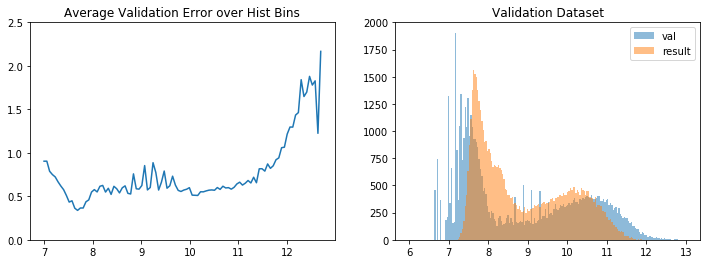

Hist_avg_error: 0.760750, Hist_avg_error_regions: 0.5745434023504977, 0.6119716918948098, 0.8742876720184005, Hist_avg_right_tail: 1.456034797071887
MSE: 0.6657346141731806, MAE: 0.6297581606118436, Accuracy: 97.466038761094
Epoch: 80
57/57 - 7s - loss: 0.1936 - val_loss: 0.3039
Epoch 82/101
57/57 - 5s - loss: 0.1936 - val_loss: 0.3046
Epoch 83/101
57/57 - 5s - loss: 0.1948 - val_loss: 0.3120
Epoch 84/101
57/57 - 5s - loss: 0.1930 - val_loss: 0.2988
Epoch 85/101
57/57 - 5s - loss: 0.1937 - val_loss: 0.2976
Epoch 86/101
57/57 - 5s - loss: 0.1943 - val_loss: 0.2987
Epoch 87/101
57/57 - 5s - loss: 0.1923 - val_loss: 0.2906
Epoch 88/101
57/57 - 5s - loss: 0.1909 - val_loss: 0.2938
Epoch 89/101
57/57 - 5s - loss: 0.1878 - val_loss: 0.2872
Epoch 90/101
57/57 - 5s - loss: 0.1882 - val_loss: 0.2883
Epoch 91/101


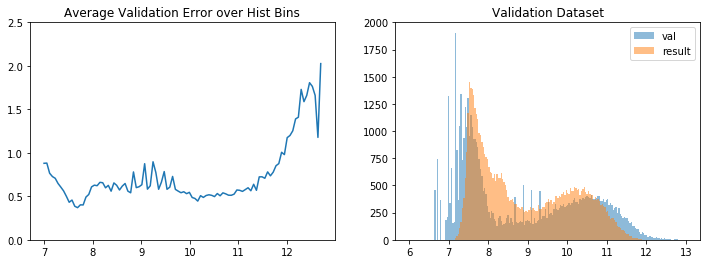

Hist_avg_error: 0.732760, Hist_avg_error_regions: 0.5759481032765681, 0.6427912013698809, 0.8134083695329997, Hist_avg_right_tail: 1.385429212731907
MSE: 0.6529398806073007, MAE: 0.6113020133540039, Accuracy: 97.53667813801847
Epoch: 90
57/57 - 7s - loss: 0.1859 - val_loss: 0.2953
Epoch 92/101
57/57 - 5s - loss: 0.1889 - val_loss: 0.2987
Epoch 93/101
57/57 - 5s - loss: 0.1889 - val_loss: 0.2960
Epoch 94/101
57/57 - 5s - loss: 0.1834 - val_loss: 0.2947
Epoch 95/101
57/57 - 5s - loss: 0.1841 - val_loss: 0.2926
Epoch 96/101
57/57 - 5s - loss: 0.1821 - val_loss: 0.3091
Epoch 97/101
57/57 - 5s - loss: 0.1860 - val_loss: 0.2919
Epoch 98/101
57/57 - 5s - loss: 0.1823 - val_loss: 0.2830
Epoch 99/101
57/57 - 5s - loss: 0.1802 - val_loss: 0.2930
Epoch 100/101
57/57 - 5s - loss: 0.1798 - val_loss: 0.3057
Epoch 101/101


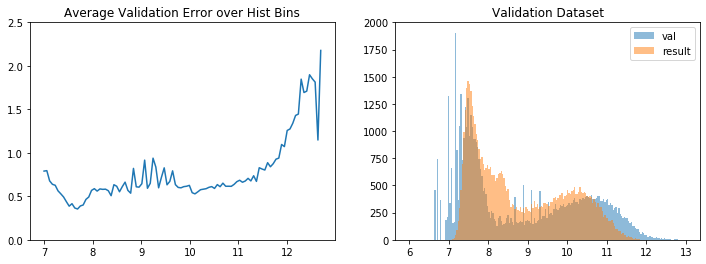

Hist_avg_error: 0.770665, Hist_avg_error_regions: 0.5202859415073726, 0.6327600992810638, 0.8969991200419106, Hist_avg_right_tail: 1.4656611391016563
MSE: 0.6608343060356691, MAE: 0.6163040500540506, Accuracy: 97.47509509146893
Epoch: 100
57/57 - 7s - loss: 0.1819 - val_loss: 0.3041


In [11]:
history = model.fit(X[:,:148], 
                    np.concatenate((y_train_aurora_type_encoded, y_train_log),axis=1), 
                    validation_data=(
                        X_test[:,:148], 
                        np.concatenate((y_val_aurora_type_encoded, y_val_log),axis=1),                                    ),
                    batch_size=32768,epochs=101,verbose=2,
                   callbacks=[metrics_callback])#

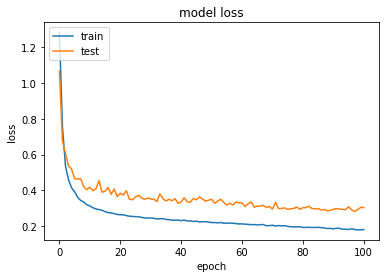

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:270: RuntimeWarning: invalid value encountered in true_divide


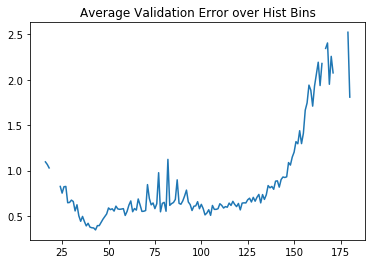

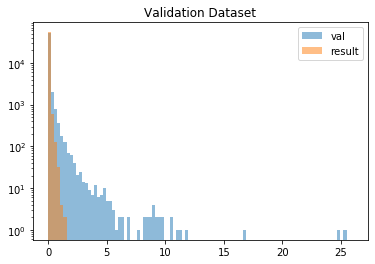

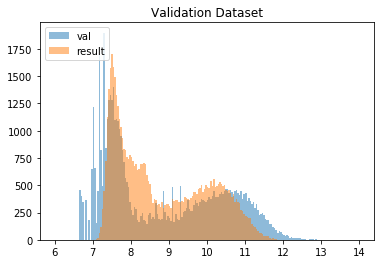

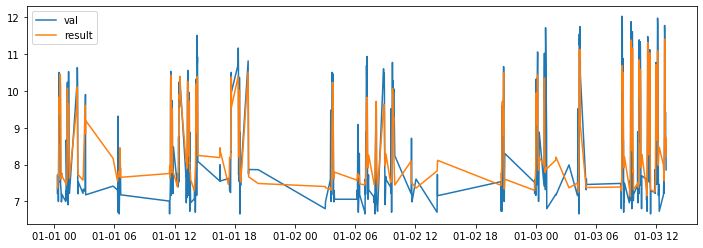

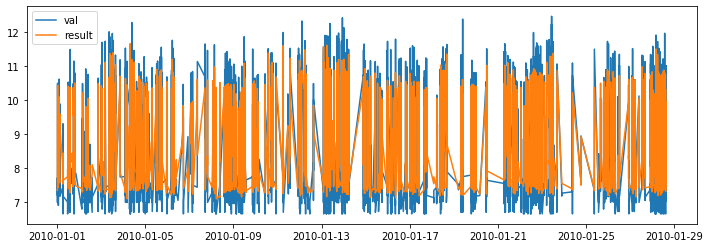

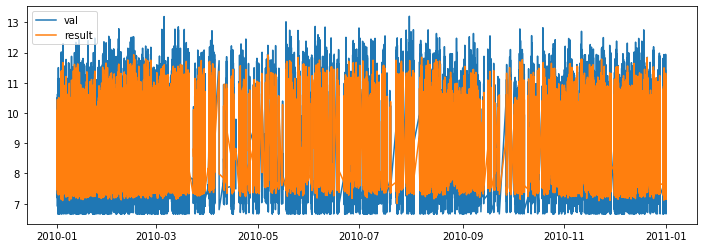

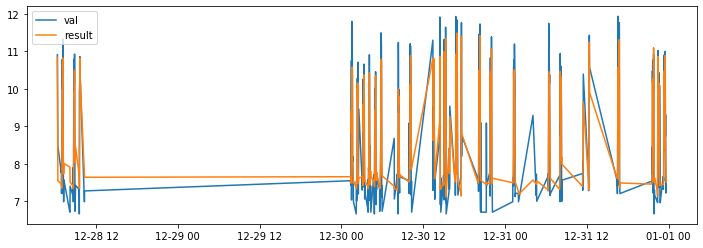

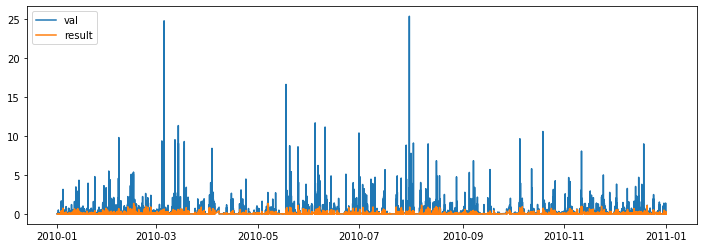

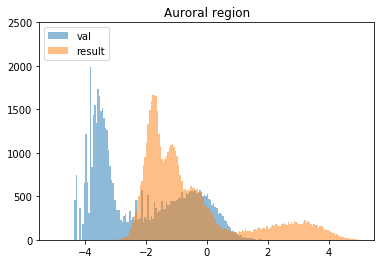

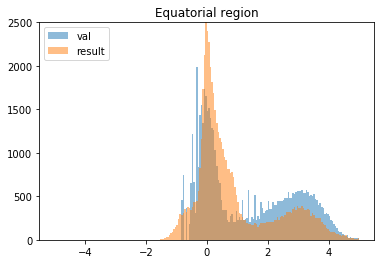

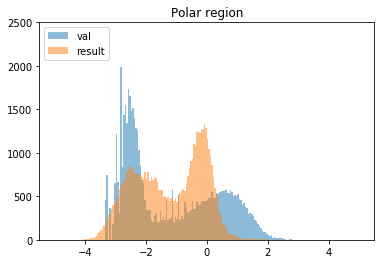

Region 0 MAE: 0.6291028135475307
Region 1 MAE: 0.5499276184076751
Region 2 MAE: 0.7379280786023709


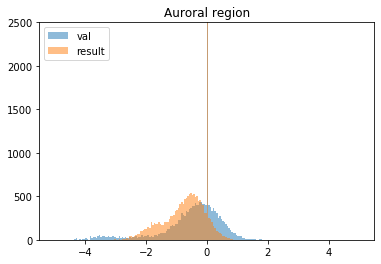

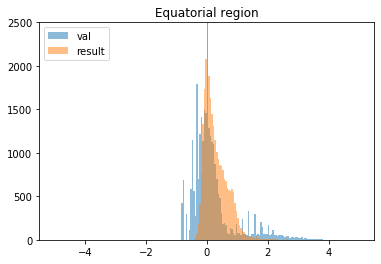

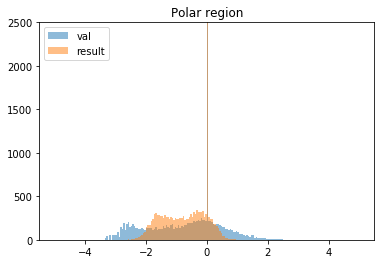

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:397: RuntimeWarning: invalid value encountered in true_divide


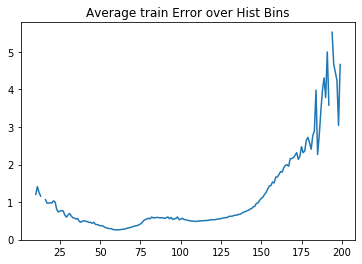

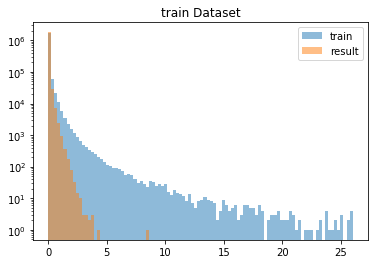

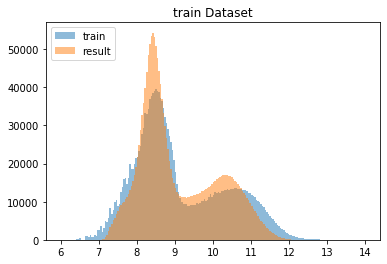

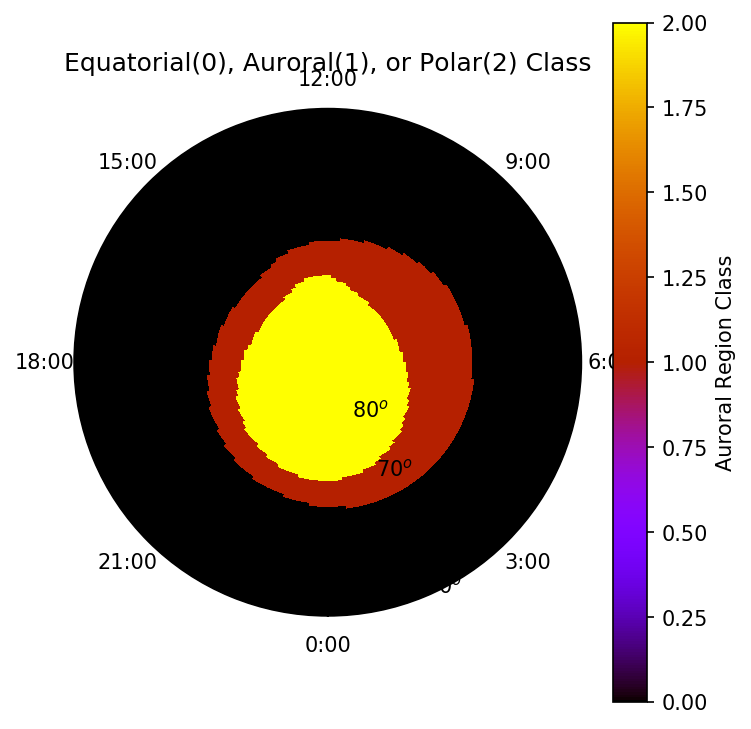

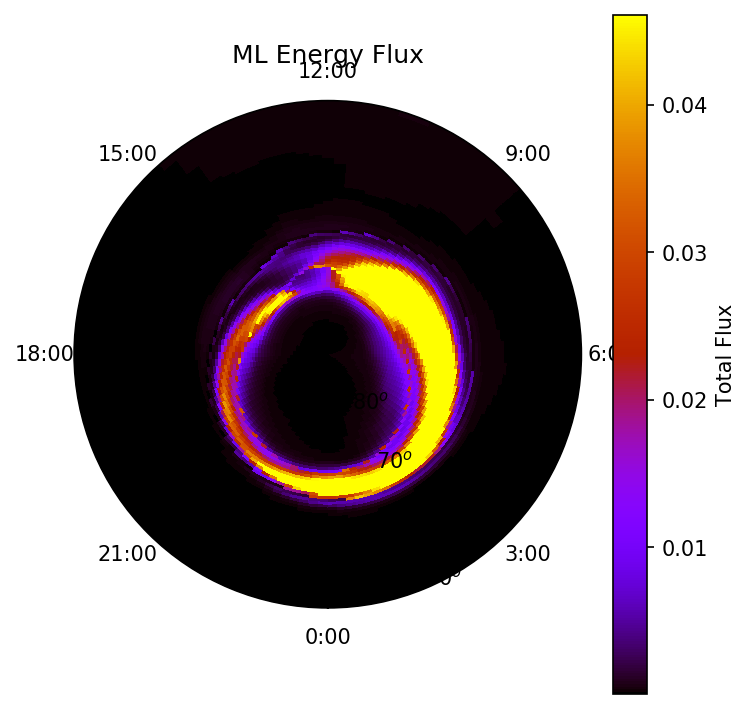

2010-09-20 07:41:00
Correction Applied
Correction Applied
Correction Applied


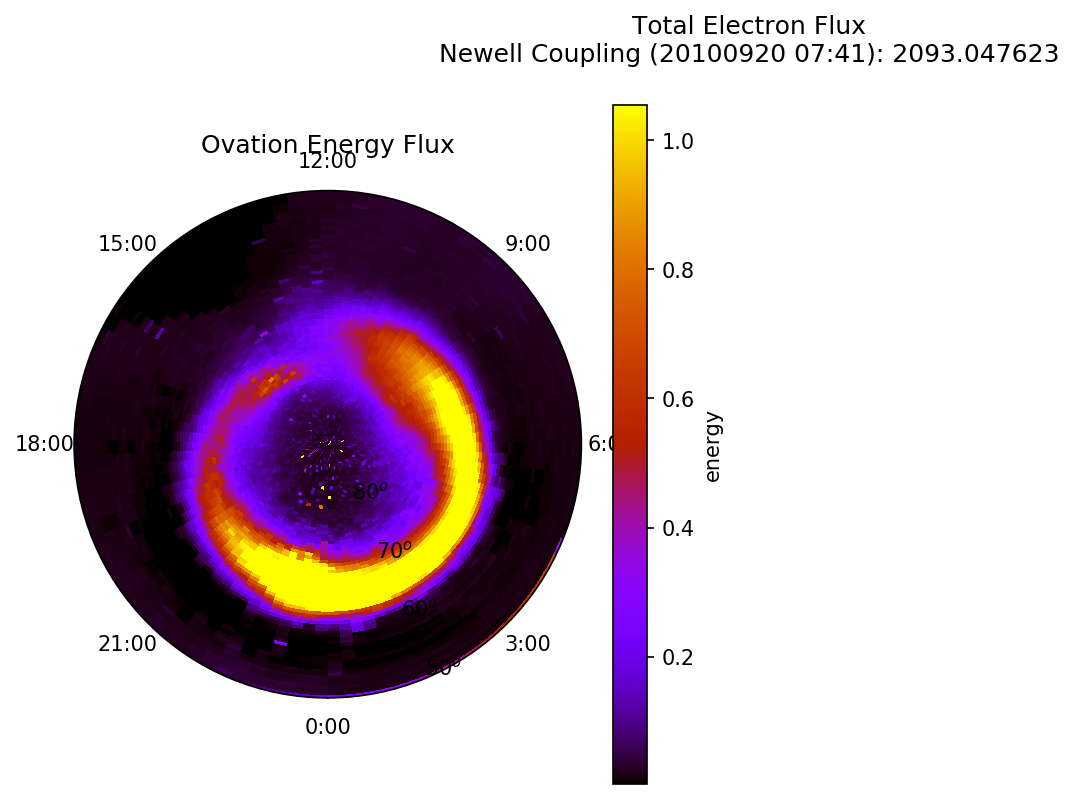

In [12]:
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plots(model, X, y_train_log1, y_train_aurora_type_encoded, X_test, y_val_log1, y_val_aurora_type_encoded,)

time_index = 40880
datetime = X_val.index[time_index]
X_model_in = X_val.values[time_index,:148]
scaler_X_all = scaler_X.fit(X_train.values[:,:148])
compare_ovation(model, datetime, X_model_in, scaler_X_all)

In [14]:
model.save('all_years_relu_nodropout_101_epochs.model')
model.save_weights('all_years_relu_nodropout_101_epochs.weights')

W0909 11:42:27.398154 140412516140864 deprecation.py:506] From /home/jackalak/.local/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
model.load_weights('all_years_relu_nodropout_101_epochs.weights')

Epoch 1/41


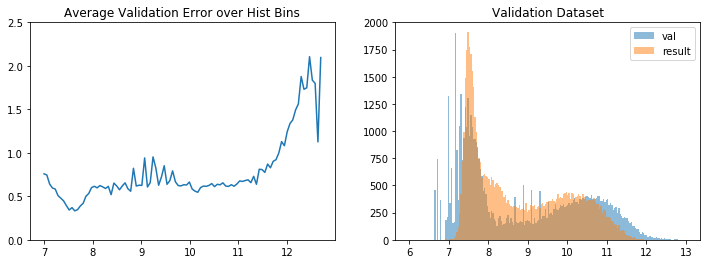

Hist_avg_error: 0.778997, Hist_avg_error_regions: 0.49082755039080284, 0.6498382844883439, 0.9118733157894328, Hist_avg_right_tail: 1.4976412570153328
MSE: 0.6684038032426484, MAE: 0.6082370634042968, Accuracy: 97.46241622894404
Epoch: 0
57/57 - 7s - loss: 0.1291 - val_loss: 0.3351
Epoch 2/41


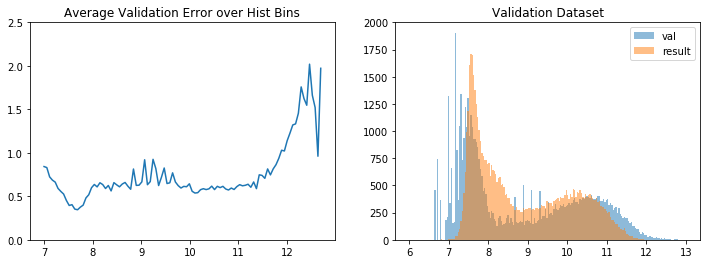

Hist_avg_error: 0.754090, Hist_avg_error_regions: 0.5390282566591577, 0.6610412673119535, 0.8518385907582802, Hist_avg_right_tail: 1.375872620779476
MSE: 0.6795989981185402, MAE: 0.6205757214663282, Accuracy: 97.61999637746786
Epoch: 1
57/57 - 7s - loss: 0.1390 - val_loss: 0.3331
Epoch 3/41


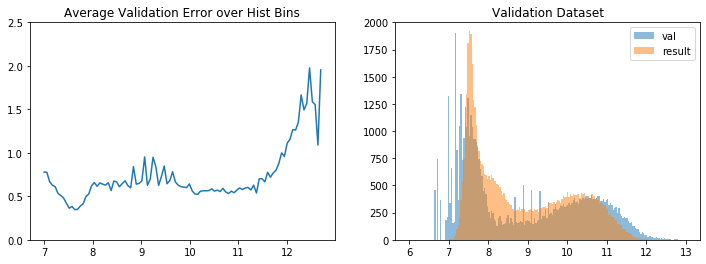

Hist_avg_error: 0.737328, Hist_avg_error_regions: 0.5092003982616619, 0.677200372264094, 0.8246711319868792, Hist_avg_right_tail: 1.3335587126489556
MSE: 0.65835377822917, MAE: 0.5989843008242254, Accuracy: 97.5475457344684
Epoch: 2
57/57 - 7s - loss: 0.1282 - val_loss: 0.3279
Epoch 4/41


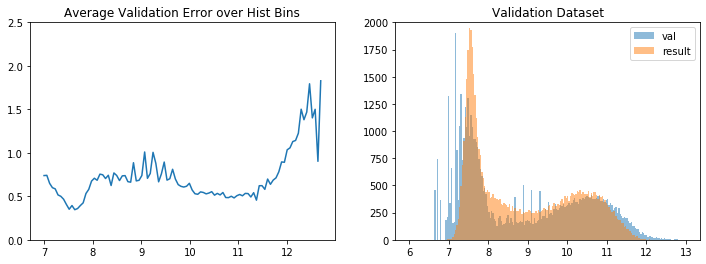

Hist_avg_error: 0.718881, Hist_avg_error_regions: 0.5002929781764085, 0.7425891514994628, 0.7681139348106414, Hist_avg_right_tail: 1.214467681451149
MSE: 0.6653865423564786, MAE: 0.591322253030853, Accuracy: 96.86107589204855
Epoch: 3
57/57 - 7s - loss: 0.1273 - val_loss: 0.3720
Epoch 5/41


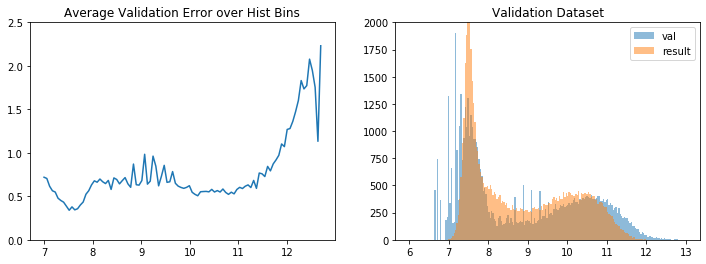

Hist_avg_error: 0.770512, Hist_avg_error_regions: 0.4800740652441823, 0.6968811760058631, 0.8804736810974041, Hist_avg_right_tail: 1.5014803537685977
MSE: 0.6556724134348637, MAE: 0.5906301802187481, Accuracy: 97.25774316247056
Epoch: 4
57/57 - 7s - loss: 0.1427 - val_loss: 0.3485
Epoch 6/41


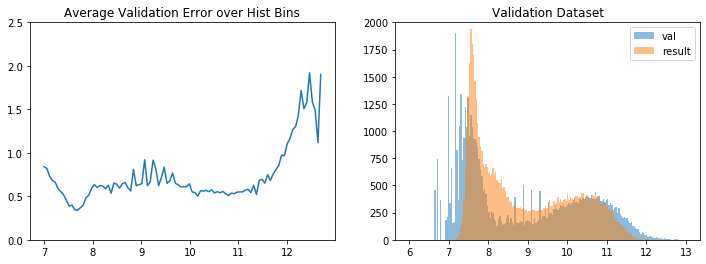

Hist_avg_error: 0.730329, Hist_avg_error_regions: 0.5355697850654795, 0.6533200527490552, 0.8157758417092359, Hist_avg_right_tail: 1.3347602397009926
MSE: 0.6623490127516922, MAE: 0.6048338256882381, Accuracy: 97.64173157036768
Epoch: 5
57/57 - 7s - loss: 0.1432 - val_loss: 0.3236
Epoch 7/41


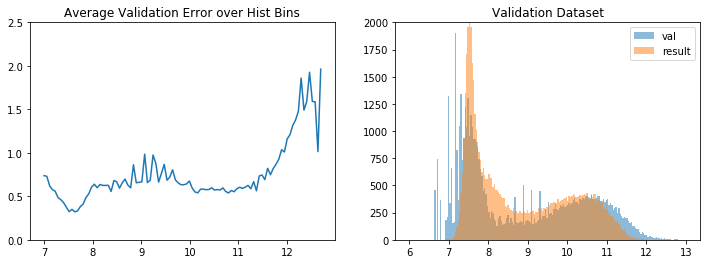

Hist_avg_error: 0.749331, Hist_avg_error_regions: 0.4735778093757331, 0.6796943643039104, 0.8536182661361355, Hist_avg_right_tail: 1.3767381191967436
MSE: 0.6530322919656241, MAE: 0.5912856767644669, Accuracy: 97.20702771237094
Epoch: 6
57/57 - 7s - loss: 0.1249 - val_loss: 0.3449
Epoch 8/41


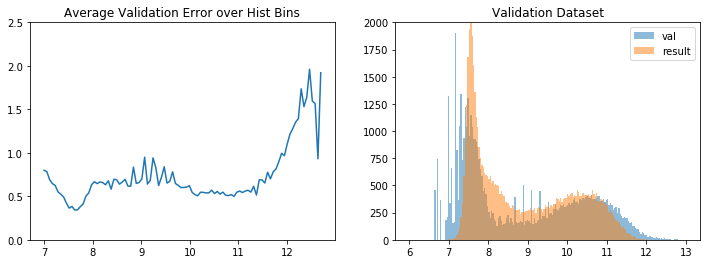

Hist_avg_error: 0.736230, Hist_avg_error_regions: 0.5165836477397541, 0.6884017952618806, 0.8160616835022276, Hist_avg_right_tail: 1.3466961629031757
MSE: 0.6595618452922041, MAE: 0.5977942809130214, Accuracy: 97.65078790074261
Epoch: 7
57/57 - 7s - loss: 0.1377 - val_loss: 0.3228
Epoch 9/41


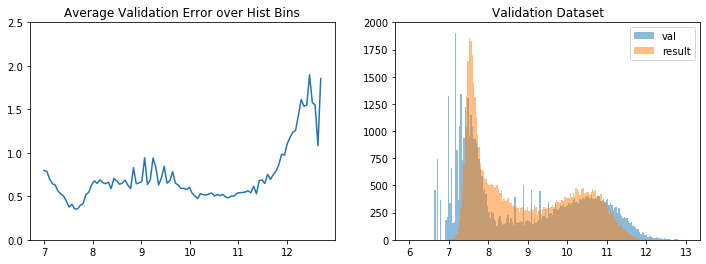

Hist_avg_error: 0.727941, Hist_avg_error_regions: 0.5263590768074122, 0.6864282972984906, 0.8001967060609935, Hist_avg_right_tail: 1.3217266255835673
MSE: 0.6619222986186684, MAE: 0.5961799148120913, Accuracy: 97.50045281651875
Epoch: 8
57/57 - 7s - loss: 0.1239 - val_loss: 0.3330
Epoch 10/41


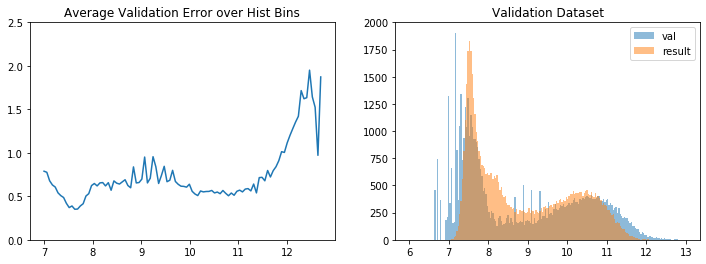

Hist_avg_error: 0.742024, Hist_avg_error_regions: 0.5128419859912643, 0.6834058357804997, 0.8290133422190676, Hist_avg_right_tail: 1.356827254419839
MSE: 0.6621073377251475, MAE: 0.6001788434238919, Accuracy: 97.60369498279297
Epoch: 9
57/57 - 7s - loss: 0.1242 - val_loss: 0.3285
Epoch 11/41


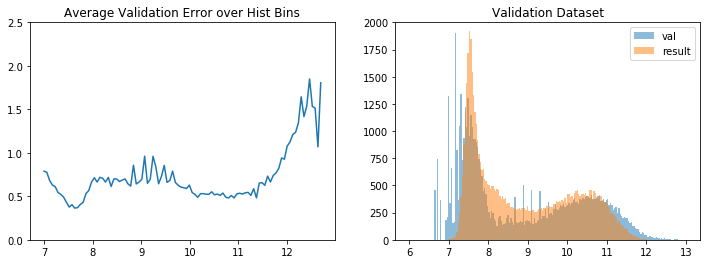

Hist_avg_error: 0.725467, Hist_avg_error_regions: 0.5223444452578918, 0.7083766708972407, 0.7877935614571024, Hist_avg_right_tail: 1.2834066986691752
MSE: 0.6667407437701278, MAE: 0.5969361224919951, Accuracy: 97.53124433979352
Epoch: 10
57/57 - 7s - loss: 0.1213 - val_loss: 0.3342
Epoch 12/41
57/57 - 5s - loss: 0.1238 - val_loss: 0.3474
Epoch 13/41
57/57 - 5s - loss: 0.1383 - val_loss: 0.3354
Epoch 14/41
57/57 - 5s - loss: 0.1215 - val_loss: 0.3375
Epoch 15/41
57/57 - 5s - loss: 0.1178 - val_loss: 0.3421
Epoch 16/41
57/57 - 5s - loss: 0.1215 - val_loss: 0.3440
Epoch 17/41
57/57 - 5s - loss: 0.1583 - val_loss: 0.3266
Epoch 18/41
57/57 - 5s - loss: 0.1177 - val_loss: 0.3330
Epoch 19/41
57/57 - 5s - loss: 0.1148 - val_loss: 0.3434
Epoch 20/41
57/57 - 5s - loss: 0.1462 - val_loss: 0.3157
Epoch 21/41


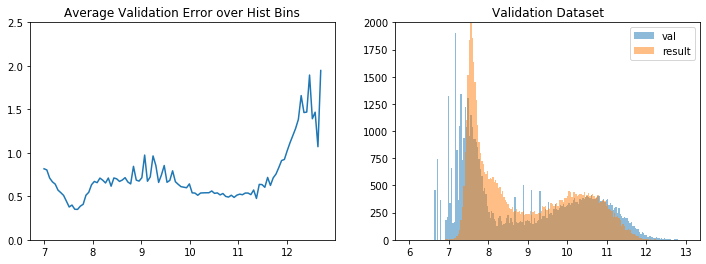

Hist_avg_error: 0.727630, Hist_avg_error_regions: 0.5306097846158856, 0.7113506083032255, 0.7879567210185042, Hist_avg_right_tail: 1.281309763216258
MSE: 0.6753515438610312, MAE: 0.6033127918949873, Accuracy: 97.57652599166818
Epoch: 20
57/57 - 7s - loss: 0.1347 - val_loss: 0.3372
Epoch 22/41
57/57 - 5s - loss: 0.1154 - val_loss: 0.3394
Epoch 23/41
57/57 - 5s - loss: 0.1132 - val_loss: 0.3447
Epoch 24/41
57/57 - 5s - loss: 0.1189 - val_loss: 0.3520
Epoch 25/41
57/57 - 5s - loss: 0.1126 - val_loss: 0.3403
Epoch 26/41
57/57 - 5s - loss: 0.1161 - val_loss: 0.3515
Epoch 27/41
57/57 - 5s - loss: 0.1144 - val_loss: 0.3497
Epoch 28/41
57/57 - 5s - loss: 0.1772 - val_loss: 0.3171
Epoch 29/41
57/57 - 5s - loss: 0.1193 - val_loss: 0.3403
Epoch 30/41
57/57 - 5s - loss: 0.1126 - val_loss: 0.3602
Epoch 31/41


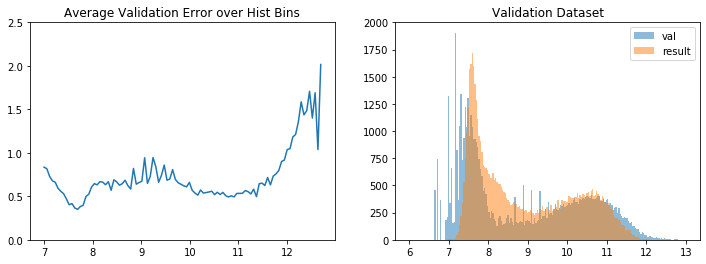

Hist_avg_error: 0.724470, Hist_avg_error_regions: 0.5427632508991234, 0.6810620609013541, 0.7921396804408233, Hist_avg_right_tail: 1.2686560564173357
MSE: 0.6844349341941133, MAE: 0.6087050162241848, Accuracy: 97.49683028436877
Epoch: 30
57/57 - 7s - loss: 0.1158 - val_loss: 0.3544
Epoch 32/41
57/57 - 5s - loss: 0.1197 - val_loss: 0.3432
Epoch 33/41
57/57 - 5s - loss: 0.1085 - val_loss: 0.3583
Epoch 34/41
57/57 - 5s - loss: 0.1086 - val_loss: 0.3604
Epoch 35/41
57/57 - 5s - loss: 0.1118 - val_loss: 0.5284
Epoch 36/41
57/57 - 5s - loss: 0.1900 - val_loss: 0.3267
Epoch 37/41
57/57 - 5s - loss: 0.1127 - val_loss: 0.3514
Epoch 38/41
57/57 - 5s - loss: 0.1084 - val_loss: 0.3581
Epoch 39/41
57/57 - 5s - loss: 0.1110 - val_loss: 0.3798
Epoch 40/41
57/57 - 5s - loss: 0.1556 - val_loss: 0.3415
Epoch 41/41


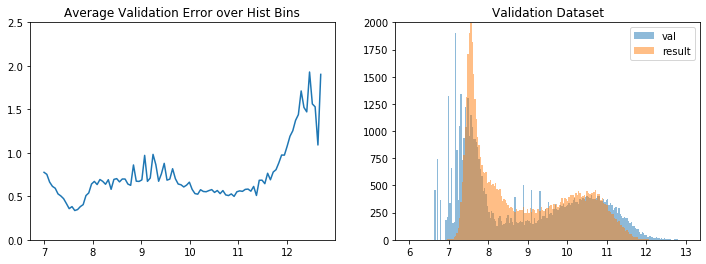

Hist_avg_error: 0.741883, Hist_avg_error_regions: 0.5025463273090487, 0.7034024950777161, 0.8230933305544067, Hist_avg_right_tail: 1.3346256023593575
MSE: 0.6723605258087145, MAE: 0.5992119001771502, Accuracy: 97.5729034595182
Epoch: 40
57/57 - 7s - loss: 0.1068 - val_loss: 0.3502


In [17]:
history = model.fit(X[:,:148], 
                    np.concatenate((y_train_aurora_type_encoded, y_train_log),axis=1), 
                    validation_data=(
                        X_test[:,:148], 
                        np.concatenate((y_val_aurora_type_encoded, y_val_log),axis=1),                                    ),
                    batch_size=32768,epochs=41,verbose=2,
                   callbacks=[metrics_callback])#

In [18]:
model.save('all_years_relu_nodropout_141_epochs.model')
model.save_weights('all_years_relu_nodropout_141_epochs.weights')
model.load_weights('all_years_relu_nodropout_141_epochs.weights')

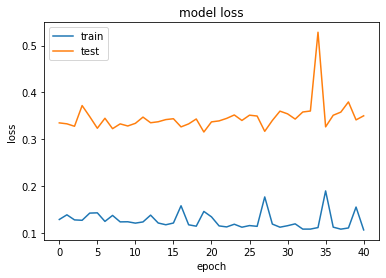

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:270: RuntimeWarning: invalid value encountered in true_divide


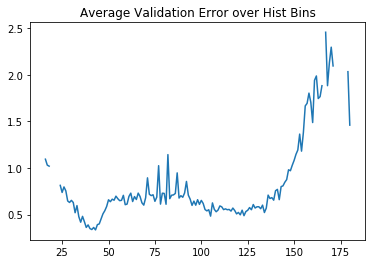

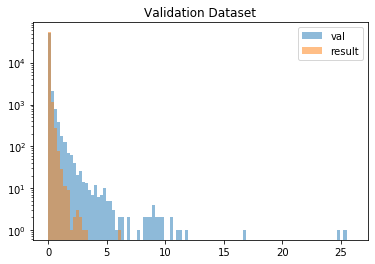

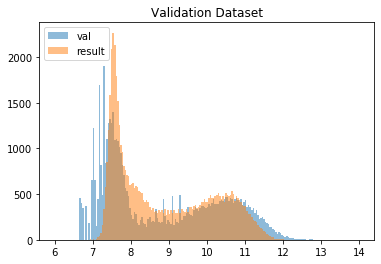

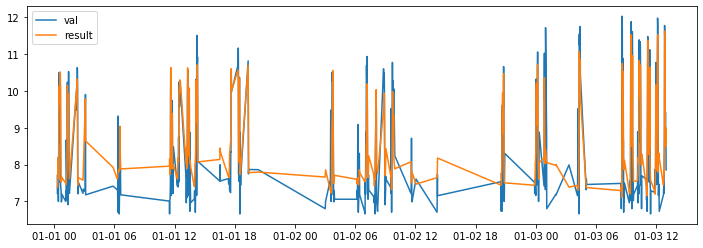

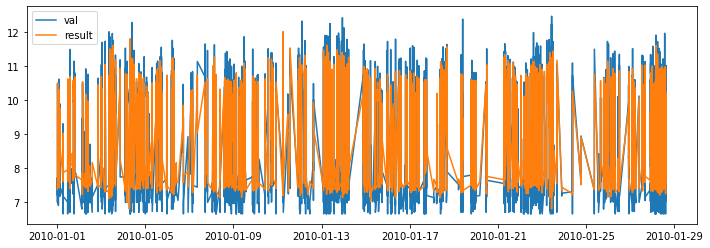

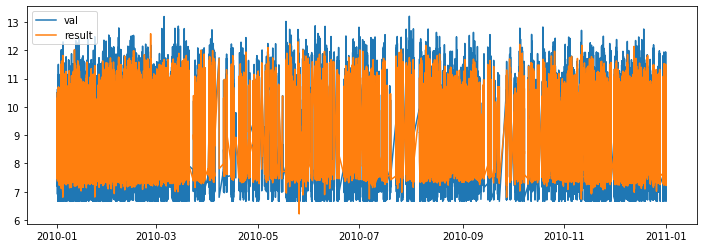

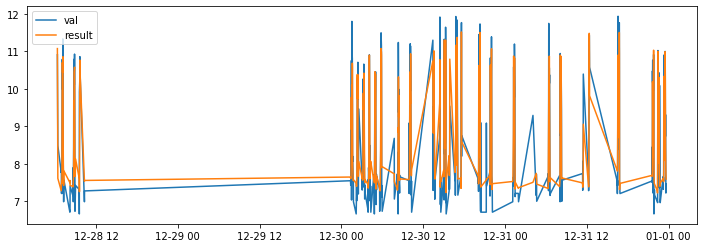

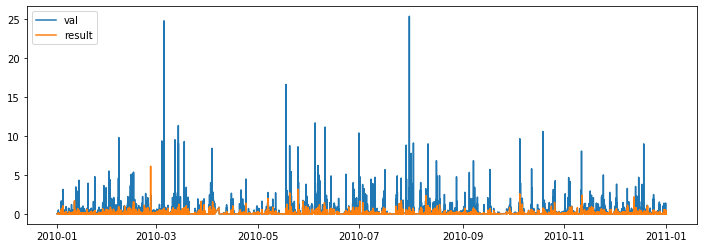

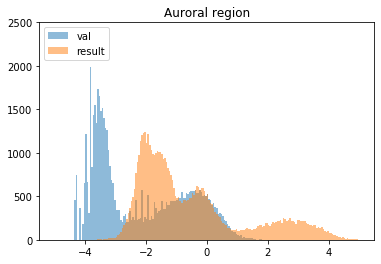

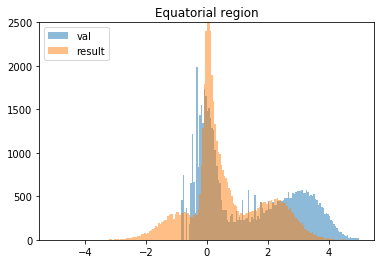

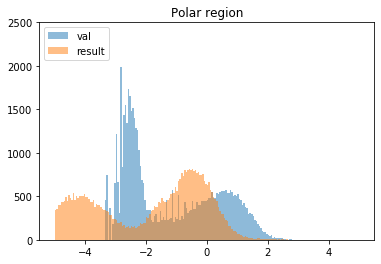

Region 0 MAE: 0.5840967010325764
Region 1 MAE: 0.5228589351376081
Region 2 MAE: 0.7645766934650138


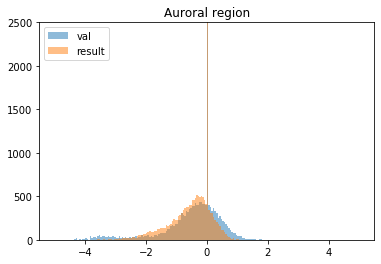

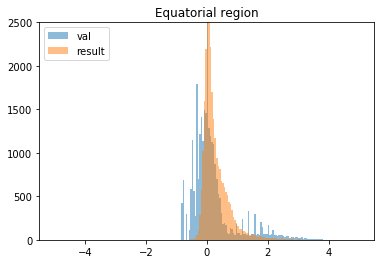

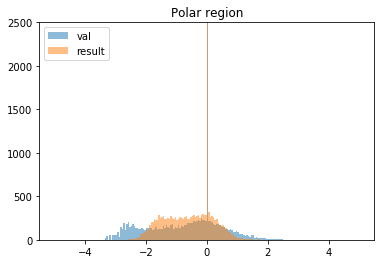

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:397: RuntimeWarning: invalid value encountered in true_divide


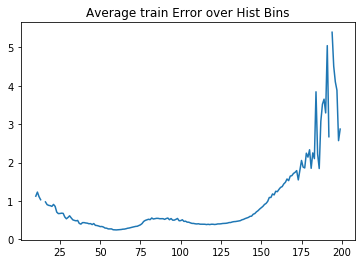

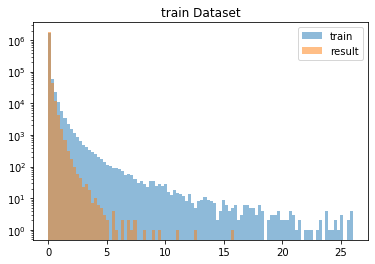

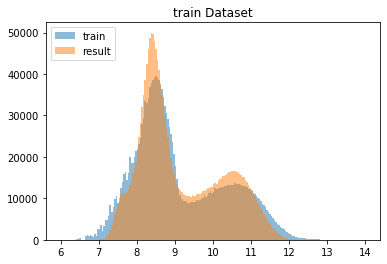

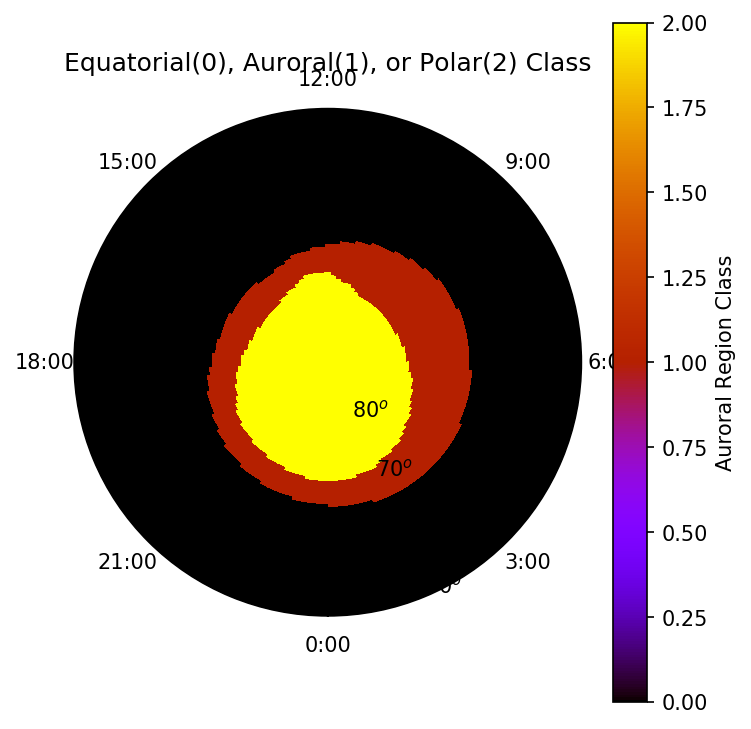

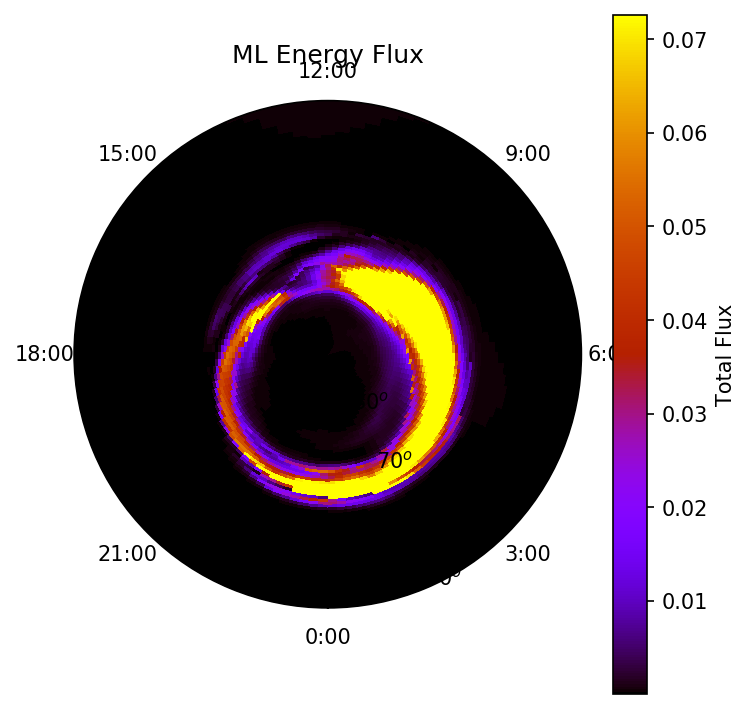

2010-09-20 07:41:00
Correction Applied
Correction Applied
Correction Applied


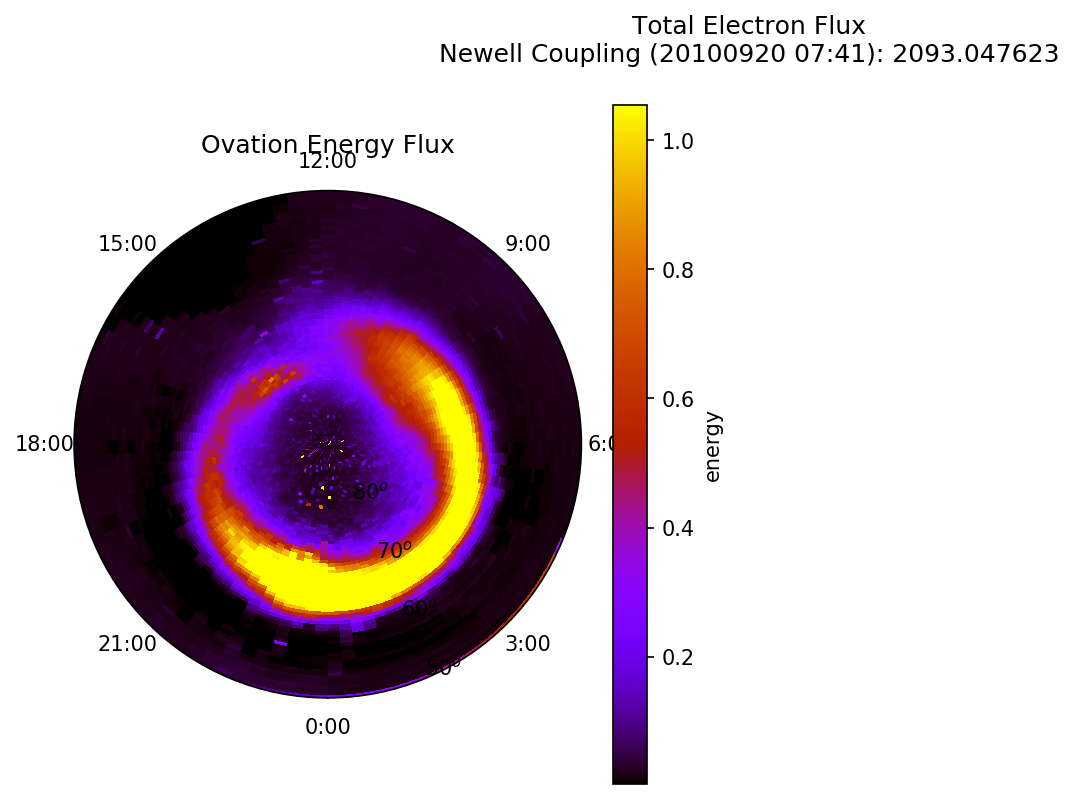

In [19]:
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plots(model, X, y_train_log1, y_train_aurora_type_encoded, X_test, y_val_log1, y_val_aurora_type_encoded,)

time_index = 40880
datetime = X_val.index[time_index]
X_model_in = X_val.values[time_index,:148]
scaler_X_all = scaler_X.fit(X_train.values[:,:148])
compare_ovation(model, datetime, X_model_in, scaler_X_all)

# with dropout, early stopping is used on the loss, and also ran afterwards for an additional 101 epochs after the lowest loss epoch which is not necessarily the lowest MSE

In [24]:
from tensorflow.keras.layers import Input,Dropout

input1 = Input(shape=(148))
model1 = Dense(64,  activation='relu')(input1)
model1 = Dense(32, activation='relu')(model1)
model1 = Dense(int(256),   activation='relu')(model1)
model1 = Dense(int(1024),  activation='relu')(model1)
model1 = Dense(int(1024),  activation='relu')(model1)
model1 = Dropout(.5)(model1)

model1 = Dense(int(256),  activation='relu')(model1)
model1 = Dense(32, activation='relu')(model1)

output1 = Dense(3, activation='softmax',name="class_output")(model1)
output2 = Dense(3,  name="residual")(model1)
output = tensorflow.keras.layers.concatenate([output1,output2])
model = tensorflow.keras.models.Model(inputs=input1, outputs=output)
#compile model using accuracy to measure model performance
model.compile(loss=custom_mse, optimizer='adam')
model.summary()



Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 148)]        0                                            
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 64)           9536        input_4[0][0]                    
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 32)           2080        dense_21[0][0]                   
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 256)          8448        dense_22[0][0]                   
____________________________________________________________________________________________

Epoch 1/400


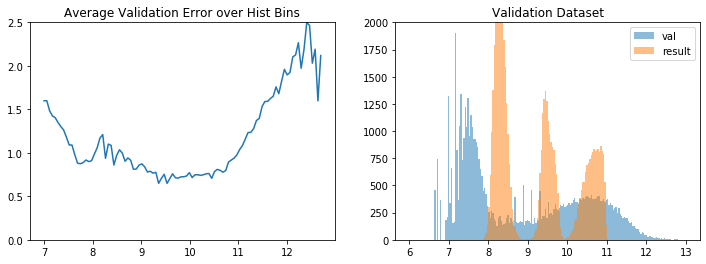

Hist_avg_error: 1.171926, Hist_avg_error_regions: 1.2075637720841619, 0.9311510426017467, 1.2642843809595503, Hist_avg_right_tail: 2.0349691511939887
MSE: 1.782112503186504, MAE: 1.0817669492161515, Accuracy: 77.62361890961782
Epoch: 0
57/57 - 7s - loss: 1.3139 - val_loss: 0.9253
Epoch 2/400


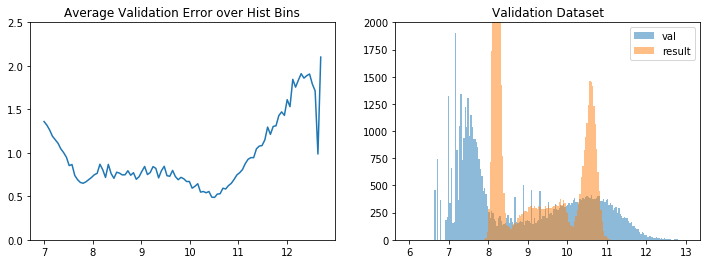

Hist_avg_error: 0.953249, Hist_avg_error_regions: 0.9699335000599588, 0.7692246114062281, 1.0267008191296874, Hist_avg_right_tail: 1.6687027547453166
MSE: 1.2088446726959474, MAE: 0.8792176164093859, Accuracy: 87.44611483426915
Epoch: 1
57/57 - 7s - loss: 0.6694 - val_loss: 0.6375
Epoch 3/400


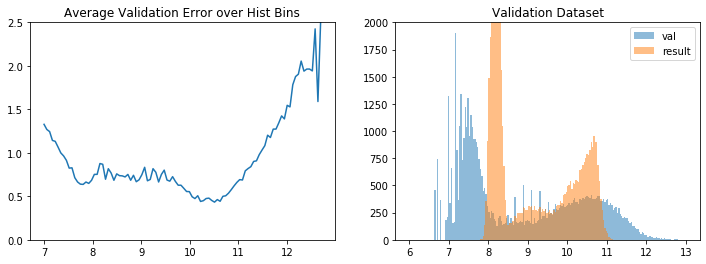

Hist_avg_error: 0.929381, Hist_avg_error_regions: 0.9394426143496573, 0.7434341492336405, 1.0054439070317156, Hist_avg_right_tail: 1.7936481020231727
MSE: 1.0740839319932625, MAE: 0.828429864662892, Accuracy: 89.88226770512588
Epoch: 2
57/57 - 7s - loss: 0.5099 - val_loss: 0.5613
Epoch 4/400


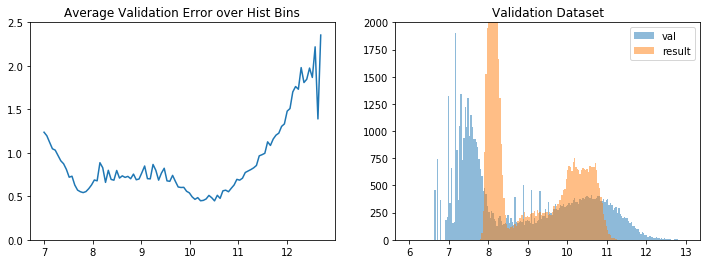

Hist_avg_error: 0.890935, Hist_avg_error_regions: 0.8433737045357906, 0.734495531086219, 0.9701206903644665, Hist_avg_right_tail: 1.6873641652057125
MSE: 0.9503907123636047, MAE: 0.7828703069643485, Accuracy: 91.67179858721246
Epoch: 3
57/57 - 7s - loss: 0.4515 - val_loss: 0.5114
Epoch 5/400


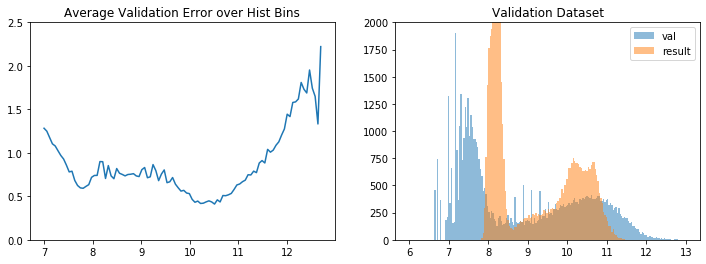

Hist_avg_error: 0.865706, Hist_avg_error_regions: 0.8968058605562055, 0.7663018978357918, 0.899392886342736, Hist_avg_right_tail: 1.5565545604678472
MSE: 0.9635010256509454, MAE: 0.7939623502897447, Accuracy: 92.31117551168266
Epoch: 4
57/57 - 7s - loss: 0.4058 - val_loss: 0.5013
Epoch 6/400


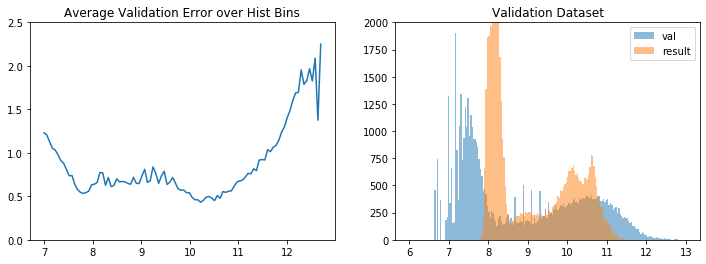

Hist_avg_error: 0.857867, Hist_avg_error_regions: 0.8458922306483013, 0.6839104277396107, 0.9348255138499373, Hist_avg_right_tail: 1.6304581990862377
MSE: 0.8949834409414235, MAE: 0.7679026787278295, Accuracy: 93.80184749139649
Epoch: 5
57/57 - 7s - loss: 0.3839 - val_loss: 0.4553
Epoch 7/400


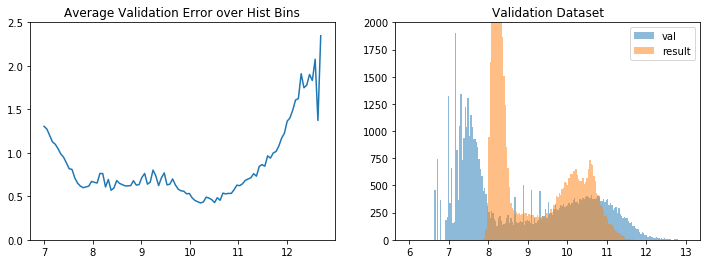

Hist_avg_error: 0.844495, Hist_avg_error_regions: 0.9179937128386219, 0.667227863202771, 0.8996760319236106, Hist_avg_right_tail: 1.5845824292868433
MSE: 0.9178706054177849, MAE: 0.7871284250856584, Accuracy: 94.43035681941677
Epoch: 6
57/57 - 8s - loss: 0.3613 - val_loss: 0.4490
Epoch 8/400


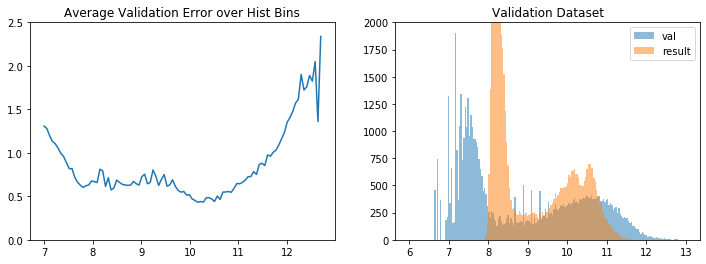

Hist_avg_error: 0.847861, Hist_avg_error_regions: 0.9239060344610326, 0.6746071815601229, 0.9006511409834743, Hist_avg_right_tail: 1.5754952353197105
MSE: 0.9192183412813891, MAE: 0.7925495791958186, Accuracy: 94.57888063756566
Epoch: 7
57/57 - 7s - loss: 0.3460 - val_loss: 0.4493
Epoch 9/400


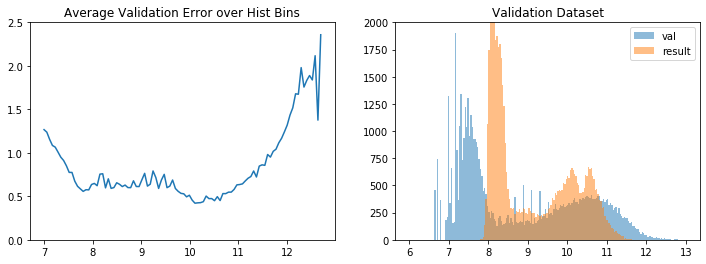

Hist_avg_error: 0.837106, Hist_avg_error_regions: 0.880425067089813, 0.6536340737072017, 0.9031001338359358, Hist_avg_right_tail: 1.6077605793582468
MSE: 0.8783808994030831, MAE: 0.7663949669161537, Accuracy: 95.11501539576163
Epoch: 8
57/57 - 7s - loss: 0.3340 - val_loss: 0.4197
Epoch 10/400


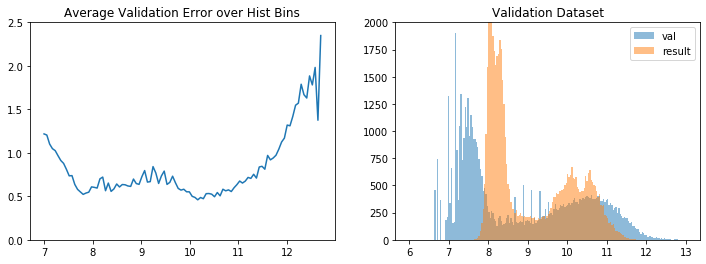

Hist_avg_error: 0.826850, Hist_avg_error_regions: 0.8415238883305008, 0.6531662936679105, 0.8964653390015113, Hist_avg_right_tail: 1.5253859420296576
MSE: 0.8621365272730966, MAE: 0.7588295712454083, Accuracy: 94.25466401014309
Epoch: 9
57/57 - 8s - loss: 0.3198 - val_loss: 0.4378
Epoch 11/400


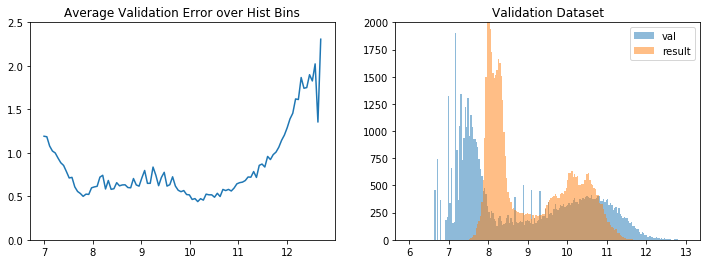

Hist_avg_error: 0.826727, Hist_avg_error_regions: 0.8180590622992289, 0.6526876956928375, 0.9028224610835087, Hist_avg_right_tail: 1.5618781630317897
MSE: 0.8359238260447052, MAE: 0.7452942938209315, Accuracy: 95.29976453541025
Epoch: 10
57/57 - 7s - loss: 0.3186 - val_loss: 0.4036
Epoch 12/400
57/57 - 6s - loss: 0.3063 - val_loss: 0.4099
Epoch 13/400
57/57 - 6s - loss: 0.2988 - val_loss: 0.4243
Epoch 14/400
57/57 - 6s - loss: 0.2969 - val_loss: 0.4118
Epoch 15/400
57/57 - 6s - loss: 0.2914 - val_loss: 0.3841
Epoch 16/400
57/57 - 6s - loss: 0.2852 - val_loss: 0.3946
Epoch 17/400
57/57 - 6s - loss: 0.2793 - val_loss: 0.3887
Epoch 18/400
57/57 - 6s - loss: 0.2783 - val_loss: 0.3839
Epoch 19/400
57/57 - 6s - loss: 0.2739 - val_loss: 0.3831
Epoch 20/400
57/57 - 6s - loss: 0.2715 - val_loss: 0.3903
Epoch 21/400


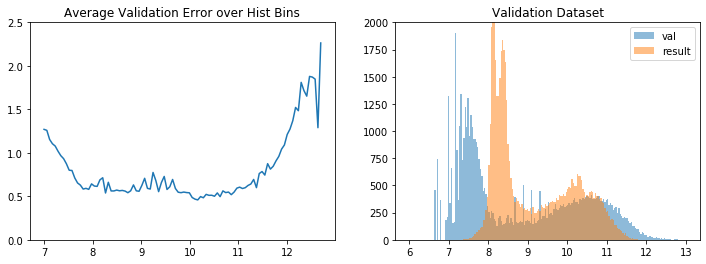

Hist_avg_error: 0.799722, Hist_avg_error_regions: 0.9013932394999495, 0.6105444581978208, 0.8523097588970912, Hist_avg_right_tail: 1.4813680091665165
MSE: 0.8533231432746405, MAE: 0.7640634040057016, Accuracy: 96.52055786995109
Epoch: 20
57/57 - 8s - loss: 0.2684 - val_loss: 0.3814
Epoch 22/400
57/57 - 6s - loss: 0.2662 - val_loss: 0.3703
Epoch 23/400
57/57 - 6s - loss: 0.2629 - val_loss: 0.3749
Epoch 24/400
57/57 - 6s - loss: 0.2634 - val_loss: 0.3729
Epoch 25/400
57/57 - 6s - loss: 0.2577 - val_loss: 0.3637
Epoch 26/400
57/57 - 6s - loss: 0.2572 - val_loss: 0.3645
Epoch 27/400
57/57 - 6s - loss: 0.2557 - val_loss: 0.3865
Epoch 28/400
57/57 - 6s - loss: 0.2539 - val_loss: 0.3748
Epoch 29/400
57/57 - 6s - loss: 0.2519 - val_loss: 0.3519
Epoch 30/400
57/57 - 6s - loss: 0.2480 - val_loss: 0.3641
Epoch 31/400


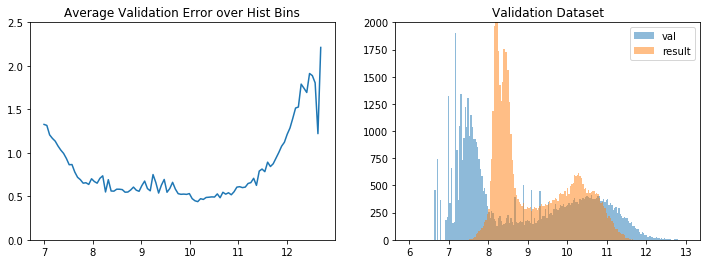

Hist_avg_error: 0.810977, Hist_avg_error_regions: 0.9631729711129591, 0.618659695092902, 0.8511931451578226, Hist_avg_right_tail: 1.4906054437943117
MSE: 0.8936291286663907, MAE: 0.7901561306843895, Accuracy: 96.93171526897301
Epoch: 30
57/57 - 8s - loss: 0.2484 - val_loss: 0.3839
Epoch 32/400
57/57 - 6s - loss: 0.2453 - val_loss: 0.3558
Epoch 33/400
57/57 - 6s - loss: 0.2473 - val_loss: 0.3567
Epoch 34/400
57/57 - 6s - loss: 0.2446 - val_loss: 0.3814
Epoch 35/400
57/57 - 6s - loss: 0.2431 - val_loss: 0.3633
Epoch 36/400
57/57 - 6s - loss: 0.2442 - val_loss: 0.3598
Epoch 37/400
57/57 - 6s - loss: 0.2408 - val_loss: 0.3572
Epoch 38/400
57/57 - 6s - loss: 0.2430 - val_loss: 0.3777
Epoch 39/400
57/57 - 6s - loss: 0.2407 - val_loss: 0.3448
Epoch 40/400
57/57 - 6s - loss: 0.2363 - val_loss: 0.3400
Epoch 41/400


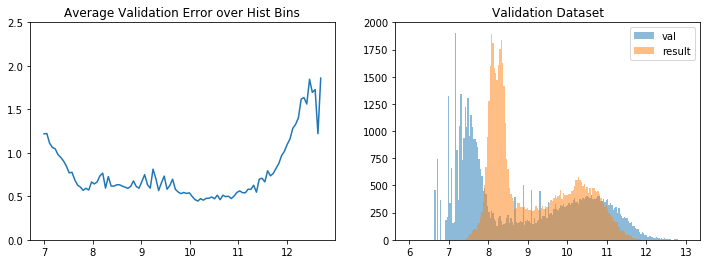

Hist_avg_error: 0.771552, Hist_avg_error_regions: 0.8730005728015233, 0.6537924876194826, 0.7939384100928262, Hist_avg_right_tail: 1.359311146065258
MSE: 0.8223065609379567, MAE: 0.7438817417052215, Accuracy: 97.13457706937149
Epoch: 40
57/57 - 7s - loss: 0.2396 - val_loss: 0.3539
Epoch 42/400
57/57 - 6s - loss: 0.2348 - val_loss: 0.3577
Epoch 43/400
57/57 - 6s - loss: 0.2345 - val_loss: 0.3645
Epoch 44/400
57/57 - 6s - loss: 0.2360 - val_loss: 0.3526
Epoch 45/400
57/57 - 6s - loss: 0.2343 - val_loss: 0.3655
Epoch 46/400
57/57 - 6s - loss: 0.2338 - val_loss: 0.3425
Epoch 47/400
57/57 - 5s - loss: 0.2281 - val_loss: 0.3554
Epoch 48/400
57/57 - 6s - loss: 0.2323 - val_loss: 0.3550
Epoch 49/400
57/57 - 6s - loss: 0.2282 - val_loss: 0.3445
Epoch 50/400
57/57 - 6s - loss: 0.2263 - val_loss: 0.3359
Epoch 51/400


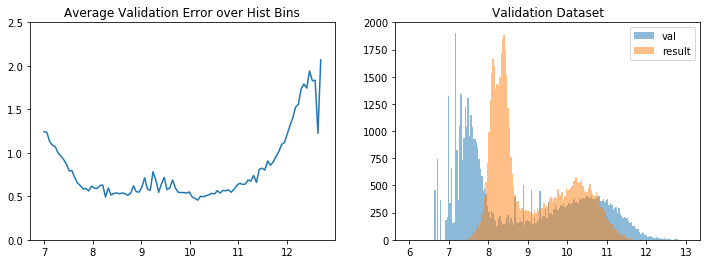

Hist_avg_error: 0.801688, Hist_avg_error_regions: 0.8925040476259384, 0.5837418526380844, 0.86941058753519, Hist_avg_right_tail: 1.491955741130694
MSE: 0.8335985963925643, MAE: 0.7626958446497223, Accuracy: 97.27042202499547
Epoch: 50
57/57 - 7s - loss: 0.2270 - val_loss: 0.3578
Epoch 52/400
57/57 - 6s - loss: 0.2258 - val_loss: 0.3648
Epoch 53/400
57/57 - 6s - loss: 0.2274 - val_loss: 0.3470
Epoch 54/400
57/57 - 6s - loss: 0.2237 - val_loss: 0.3488
Epoch 55/400
57/57 - 6s - loss: 0.2246 - val_loss: 0.3509
Epoch 56/400
57/57 - 6s - loss: 0.2247 - val_loss: 0.3405
Epoch 57/400
57/57 - 6s - loss: 0.2213 - val_loss: 0.3305
Epoch 58/400
57/57 - 6s - loss: 0.2198 - val_loss: 0.3406
Epoch 59/400
57/57 - 6s - loss: 0.2196 - val_loss: 0.3407
Epoch 60/400
57/57 - 6s - loss: 0.2184 - val_loss: 0.3524
Epoch 61/400


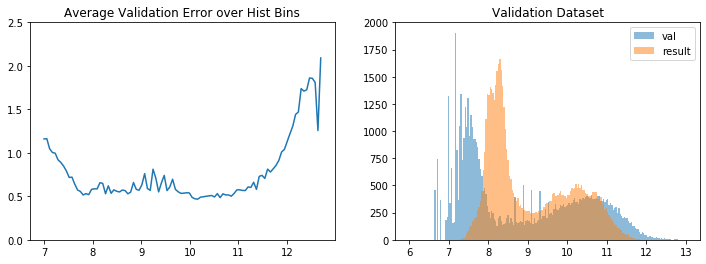

Hist_avg_error: 0.769768, Hist_avg_error_regions: 0.8166738938805406, 0.6015068421002464, 0.8283441305151092, Hist_avg_right_tail: 1.4370969201847927
MSE: 0.7721968678450325, MAE: 0.7172895432558862, Accuracy: 97.58014852381815
Epoch: 60
57/57 - 7s - loss: 0.2207 - val_loss: 0.3301
Epoch 62/400
57/57 - 6s - loss: 0.2190 - val_loss: 0.3355
Epoch 63/400
57/57 - 6s - loss: 0.2190 - val_loss: 0.3386
Epoch 64/400
57/57 - 6s - loss: 0.2146 - val_loss: 0.3161
Epoch 65/400
57/57 - 6s - loss: 0.2152 - val_loss: 0.3260
Epoch 66/400
57/57 - 6s - loss: 0.2145 - val_loss: 0.3289
Epoch 67/400
57/57 - 6s - loss: 0.2146 - val_loss: 0.3239
Epoch 68/400
57/57 - 6s - loss: 0.2125 - val_loss: 0.3105
Epoch 69/400
57/57 - 6s - loss: 0.2108 - val_loss: 0.3236
Epoch 70/400
57/57 - 6s - loss: 0.2106 - val_loss: 0.3231
Epoch 71/400


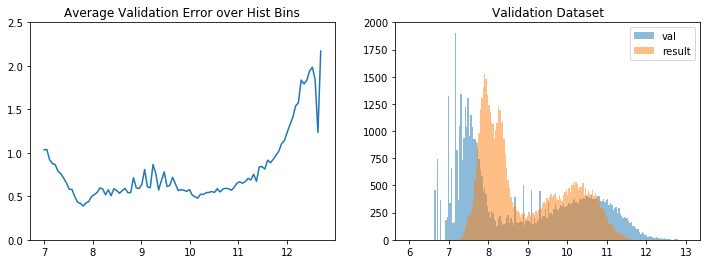

Hist_avg_error: 0.787544, Hist_avg_error_regions: 0.6852572946064668, 0.5958232836726834, 0.8965211842353847, Hist_avg_right_tail: 1.5261333750558406
MSE: 0.721014713392459, MAE: 0.6793792374284788, Accuracy: 97.5076978808187
Epoch: 70
57/57 - 7s - loss: 0.2116 - val_loss: 0.3148
Epoch 72/400
57/57 - 5s - loss: 0.2103 - val_loss: 0.3212
Epoch 73/400
57/57 - 5s - loss: 0.2096 - val_loss: 0.3102
Epoch 74/400
57/57 - 5s - loss: 0.2118 - val_loss: 0.3173
Epoch 75/400
57/57 - 5s - loss: 0.2086 - val_loss: 0.3208
Epoch 76/400
57/57 - 5s - loss: 0.2086 - val_loss: 0.3028
Epoch 77/400
57/57 - 5s - loss: 0.2056 - val_loss: 0.3064
Epoch 78/400
57/57 - 5s - loss: 0.2031 - val_loss: 0.3074
Epoch 79/400
57/57 - 5s - loss: 0.2052 - val_loss: 0.3054
Epoch 80/400
57/57 - 5s - loss: 0.2033 - val_loss: 0.2952
Epoch 81/400


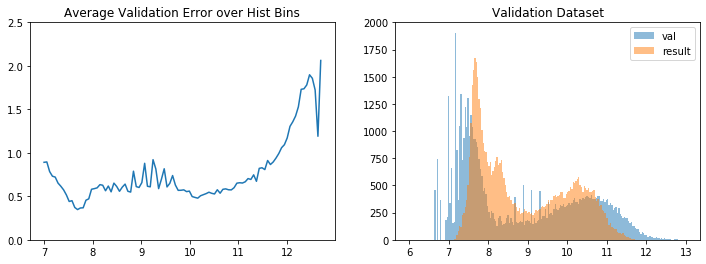

Hist_avg_error: 0.767103, Hist_avg_error_regions: 0.5737313407740439, 0.6363043581967265, 0.8749659890088708, Hist_avg_right_tail: 1.4613936824604223
MSE: 0.6711590805205204, MAE: 0.6299916449417439, Accuracy: 97.6272414417678
Epoch: 80
57/57 - 7s - loss: 0.2019 - val_loss: 0.2933
Epoch 82/400
57/57 - 6s - loss: 0.2005 - val_loss: 0.3146
Epoch 83/400
57/57 - 5s - loss: 0.2043 - val_loss: 0.2986
Epoch 84/400
57/57 - 5s - loss: 0.1987 - val_loss: 0.3071
Epoch 85/400
57/57 - 5s - loss: 0.2016 - val_loss: 0.3054
Epoch 86/400
57/57 - 6s - loss: 0.2005 - val_loss: 0.2992
Epoch 87/400
57/57 - 6s - loss: 0.1968 - val_loss: 0.3042
Epoch 88/400
57/57 - 6s - loss: 0.1986 - val_loss: 0.3065
Epoch 89/400
57/57 - 6s - loss: 0.1968 - val_loss: 0.2996
Epoch 90/400
57/57 - 6s - loss: 0.1949 - val_loss: 0.3206
Epoch 91/400


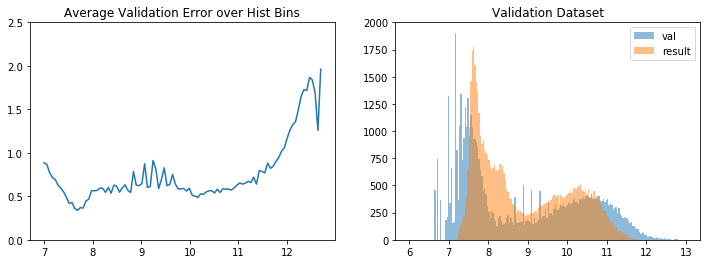

Hist_avg_error: 0.754815, Hist_avg_error_regions: 0.557668204706418, 0.6264638776389385, 0.8626644252322264, Hist_avg_right_tail: 1.426440689590101
MSE: 0.6599342854437774, MAE: 0.6210931978139561, Accuracy: 97.57833725774316
Epoch: 90
57/57 - 7s - loss: 0.1980 - val_loss: 0.2961
Epoch 92/400
57/57 - 5s - loss: 0.1936 - val_loss: 0.3012
Epoch 93/400
57/57 - 6s - loss: 0.1953 - val_loss: 0.3101
Epoch 94/400
57/57 - 6s - loss: 0.1958 - val_loss: 0.3010
Epoch 95/400
57/57 - 6s - loss: 0.1926 - val_loss: 0.3054
Epoch 96/400
57/57 - 6s - loss: 0.1898 - val_loss: 0.3004
Epoch 97/400
57/57 - 6s - loss: 0.1999 - val_loss: 0.3095
Epoch 98/400
57/57 - 6s - loss: 0.1911 - val_loss: 0.2955
Epoch 99/400
57/57 - 6s - loss: 0.1915 - val_loss: 0.2972
Epoch 100/400
57/57 - 6s - loss: 0.1883 - val_loss: 0.2920
Epoch 101/400


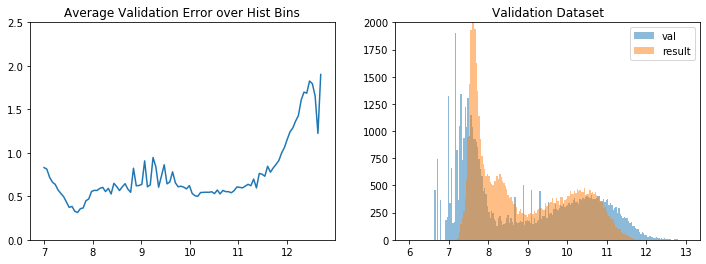

Hist_avg_error: 0.741892, Hist_avg_error_regions: 0.5169411357094735, 0.6351953150556379, 0.8481058452612942, Hist_avg_right_tail: 1.393694123355863
MSE: 0.6386600472896894, MAE: 0.6000669182762699, Accuracy: 97.54392320231842
Epoch: 100
57/57 - 7s - loss: 0.1912 - val_loss: 0.2901
Epoch 102/400
57/57 - 6s - loss: 0.1931 - val_loss: 0.2991
Epoch 103/400
57/57 - 6s - loss: 0.1869 - val_loss: 0.2985
Epoch 104/400
57/57 - 6s - loss: 0.1880 - val_loss: 0.2868
Epoch 105/400
57/57 - 6s - loss: 0.1874 - val_loss: 0.2882
Epoch 106/400
57/57 - 6s - loss: 0.1850 - val_loss: 0.2907
Epoch 107/400
57/57 - 5s - loss: 0.1849 - val_loss: 0.2869
Epoch 108/400
57/57 - 6s - loss: 0.1850 - val_loss: 0.2893
Epoch 109/400
57/57 - 6s - loss: 0.1836 - val_loss: 0.2947
Epoch 110/400
57/57 - 6s - loss: 0.1821 - val_loss: 0.2903
Epoch 111/400


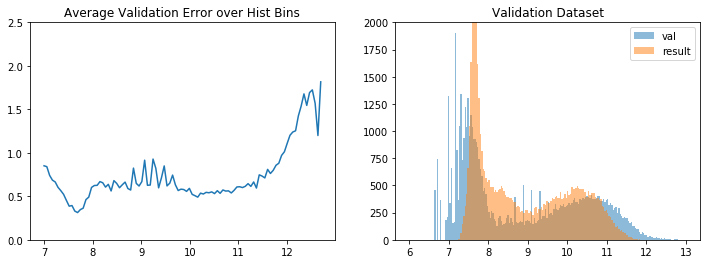

Hist_avg_error: 0.736218, Hist_avg_error_regions: 0.5327742575400016, 0.6616410716555441, 0.8229892033606475, Hist_avg_right_tail: 1.335791295658522
MSE: 0.6508003764749031, MAE: 0.6075570054847025, Accuracy: 97.59101612026807
Epoch: 110
57/57 - 7s - loss: 0.1833 - val_loss: 0.2949
Epoch 112/400
57/57 - 6s - loss: 0.1827 - val_loss: 0.2966
Epoch 113/400
57/57 - 6s - loss: 0.1846 - val_loss: 0.2884
Epoch 114/400
57/57 - 6s - loss: 0.1809 - val_loss: 0.2916
Epoch 115/400
57/57 - 6s - loss: 0.1814 - val_loss: 0.3142
Epoch 116/400
57/57 - 6s - loss: 0.1792 - val_loss: 0.2883
Epoch 117/400
57/57 - 6s - loss: 0.1813 - val_loss: 0.2989
Epoch 118/400
57/57 - 6s - loss: 0.1787 - val_loss: 0.3011
Epoch 119/400
57/57 - 6s - loss: 0.1815 - val_loss: 0.2966
Epoch 120/400
57/57 - 6s - loss: 0.1759 - val_loss: 0.2901
Epoch 121/400


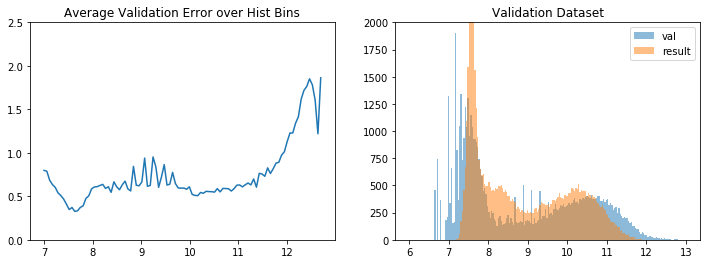

Hist_avg_error: 0.744167, Hist_avg_error_regions: 0.5036647839597282, 0.6540337097777055, 0.8475797946746834, Hist_avg_right_tail: 1.3834886011321412
MSE: 0.6380049170851675, MAE: 0.5972016755344824, Accuracy: 97.58014852381815
Epoch: 120
57/57 - 7s - loss: 0.1765 - val_loss: 0.2945
Epoch 122/400
57/57 - 6s - loss: 0.1792 - val_loss: 0.2956
Epoch 123/400
57/57 - 6s - loss: 0.1752 - val_loss: 0.2896
Epoch 124/400
57/57 - 6s - loss: 0.1757 - val_loss: 0.2944
Epoch 125/400
57/57 - 6s - loss: 0.1743 - val_loss: 0.3060
Epoch 126/400
57/57 - 6s - loss: 0.1758 - val_loss: 0.2914
Epoch 127/400
57/57 - 6s - loss: 0.1722 - val_loss: 0.2948
Epoch 128/400
57/57 - 6s - loss: 0.1738 - val_loss: 0.3092
Epoch 129/400
57/57 - 6s - loss: 0.1773 - val_loss: 0.3059
Epoch 130/400
57/57 - 6s - loss: 0.1762 - val_loss: 0.2993
Epoch 131/400


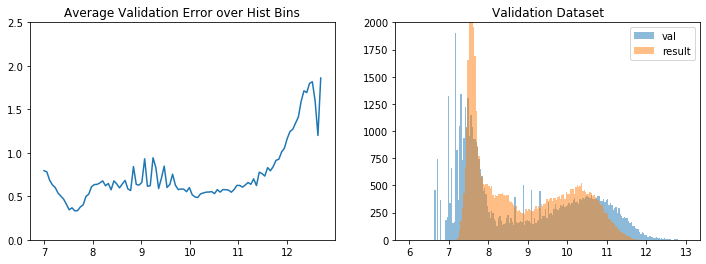

Hist_avg_error: 0.745846, Hist_avg_error_regions: 0.5043246295724764, 0.667519546252177, 0.8445328097749369, Hist_avg_right_tail: 1.3885284506151312
MSE: 0.6390424318794535, MAE: 0.5965419679591604, Accuracy: 97.37185292519472
Epoch: 130
57/57 - 8s - loss: 0.1713 - val_loss: 0.3053
Epoch 132/400
57/57 - 6s - loss: 0.1736 - val_loss: 0.2963
Epoch 133/400
57/57 - 6s - loss: 0.1680 - val_loss: 0.2941
Epoch 134/400
57/57 - 6s - loss: 0.1711 - val_loss: 0.3113
Epoch 135/400
57/57 - 6s - loss: 0.1726 - val_loss: 0.3038
Epoch 136/400
57/57 - 6s - loss: 0.1689 - val_loss: 0.3122
Epoch 137/400
57/57 - 6s - loss: 0.1696 - val_loss: 0.2976
Epoch 138/400
57/57 - 6s - loss: 0.1690 - val_loss: 0.3002
Epoch 139/400
57/57 - 6s - loss: 0.1657 - val_loss: 0.2980
Epoch 140/400
57/57 - 5s - loss: 0.1683 - val_loss: 0.2995
Epoch 141/400


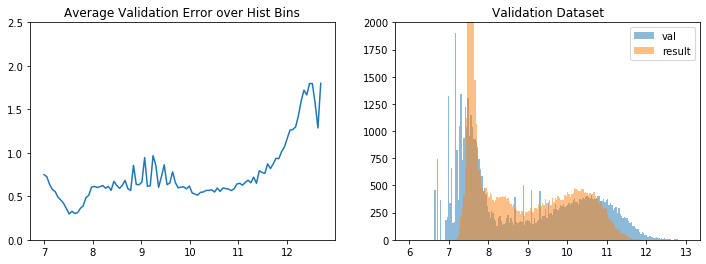

Hist_avg_error: 0.746530, Hist_avg_error_regions: 0.46505724114569846, 0.659780620935675, 0.8596205617873341, Hist_avg_right_tail: 1.388042745090406
MSE: 0.6244851155813217, MAE: 0.5846816557272345, Accuracy: 97.62905270784279
Epoch: 140
57/57 - 7s - loss: 0.1674 - val_loss: 0.2941
Epoch 142/400
57/57 - 6s - loss: 0.1668 - val_loss: 0.2926
Epoch 143/400
57/57 - 6s - loss: 0.1660 - val_loss: 0.2977
Epoch 144/400
57/57 - 6s - loss: 0.1656 - val_loss: 0.2952
Epoch 145/400
57/57 - 6s - loss: 0.1638 - val_loss: 0.3028
Epoch 146/400
57/57 - 6s - loss: 0.1637 - val_loss: 0.3004
Epoch 147/400
57/57 - 6s - loss: 0.1658 - val_loss: 0.2977
Epoch 148/400
57/57 - 6s - loss: 0.1635 - val_loss: 0.3008
Epoch 149/400
57/57 - 6s - loss: 0.1661 - val_loss: 0.3112
Epoch 150/400
57/57 - 6s - loss: 0.1651 - val_loss: 0.2984
Epoch 151/400


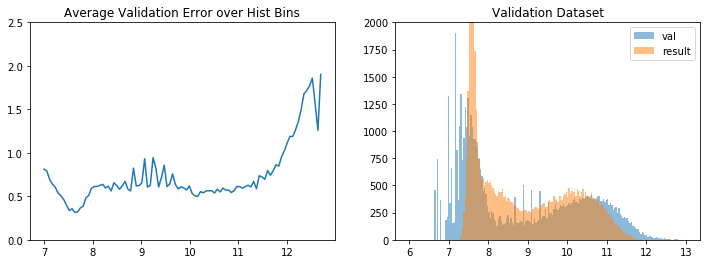

Hist_avg_error: 0.734523, Hist_avg_error_regions: 0.5011937019778985, 0.652888859443663, 0.8323890336752146, Hist_avg_right_tail: 1.356424136847728
MSE: 0.6335421515916232, MAE: 0.5925647038013175, Accuracy: 97.52399927549357
Epoch: 150
57/57 - 8s - loss: 0.1630 - val_loss: 0.3035
Epoch 152/400
57/57 - 6s - loss: 0.1600 - val_loss: 0.2999
Epoch 153/400
57/57 - 6s - loss: 0.1608 - val_loss: 0.2996
Epoch 154/400
57/57 - 6s - loss: 0.1617 - val_loss: 0.3000


In [25]:
history = model.fit(X[:,:148], 
                    np.concatenate((y_train_aurora_type_encoded, y_train_log),axis=1), 
                    validation_data=(
                        X_test[:,:148], 
                        np.concatenate((y_val_aurora_type_encoded, y_val_log),axis=1),                                    ),
                    batch_size=32768,epochs=400,verbose=2,
                   callbacks=[metrics_callback,tf.keras.callbacks.EarlyStopping(monitor='val_loss',  restore_best_weights=True,
             patience=50)])#

In [26]:
model.save('all_years_relu_dropout_best_epoch.model')
model.save_weights('all_years_relu_dropout_best_epoch.weights')
model.load_weights('all_years_relu_dropout_best_epoch.weights')

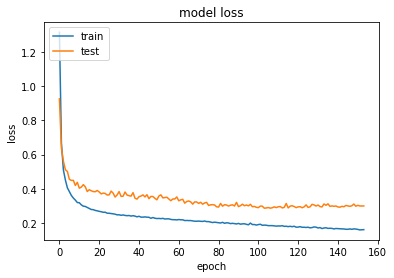

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:270: RuntimeWarning: invalid value encountered in true_divide


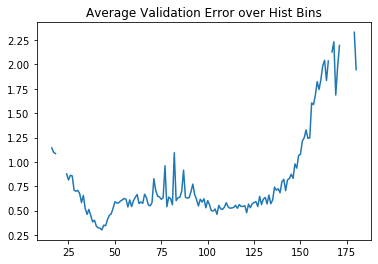

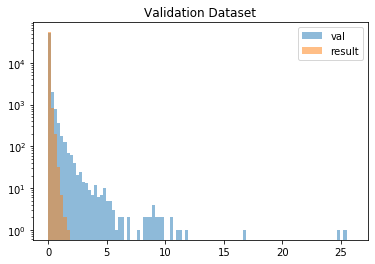

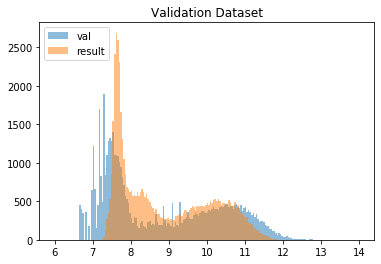

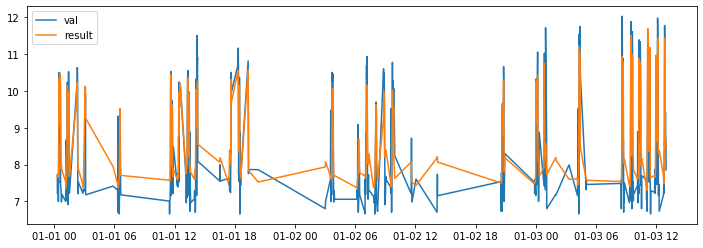

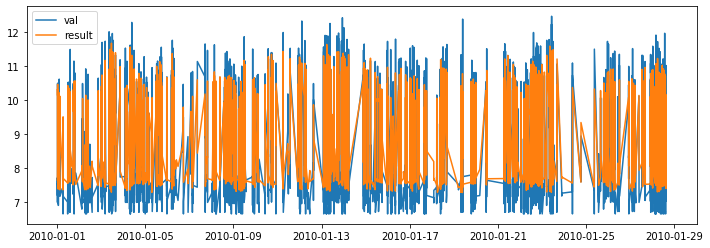

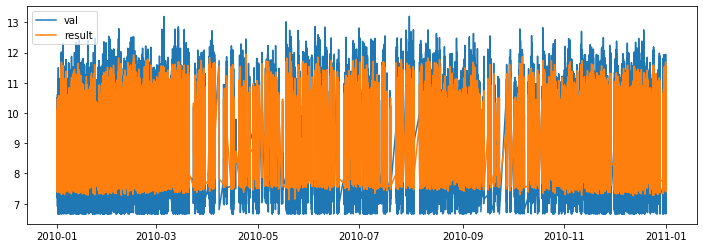

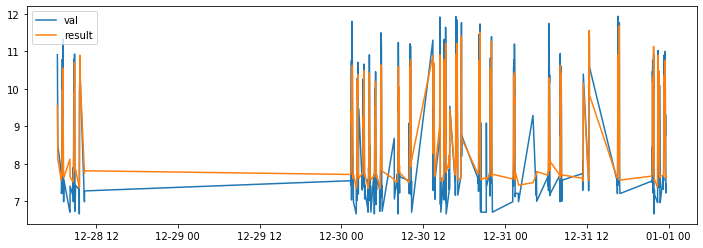

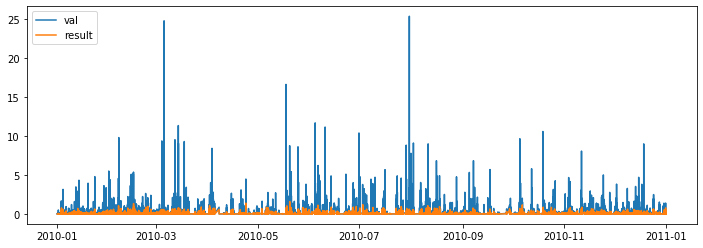

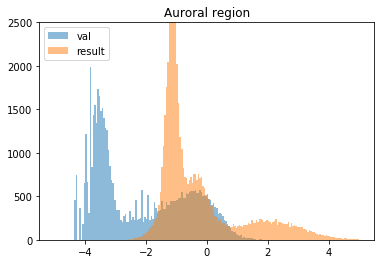

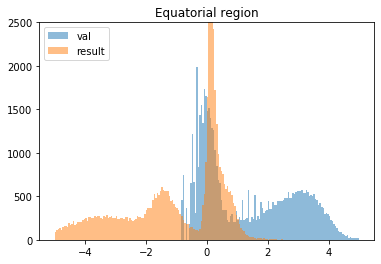

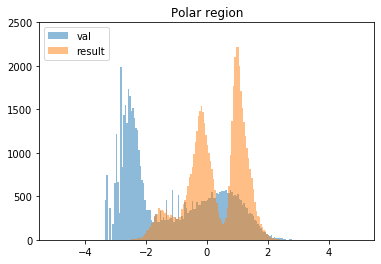

Region 0 MAE: 0.5771832067525975
Region 1 MAE: 0.5376996112855649
Region 2 MAE: 0.7319712865245155


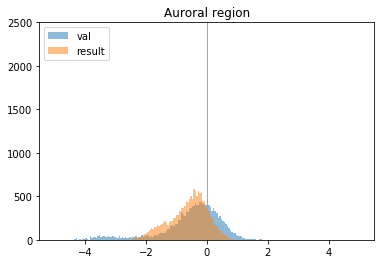

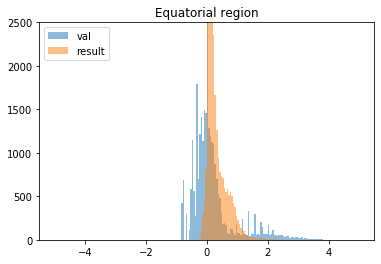

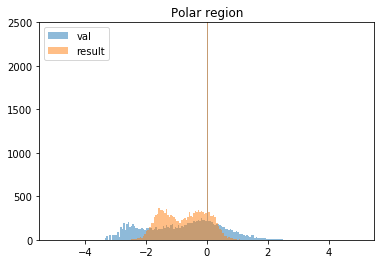

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:397: RuntimeWarning: invalid value encountered in true_divide


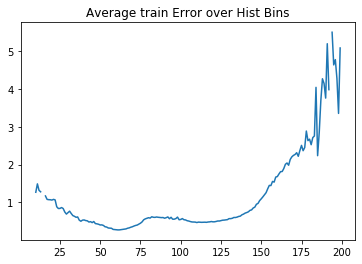

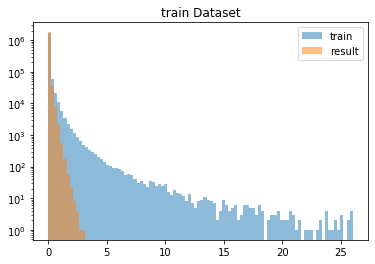

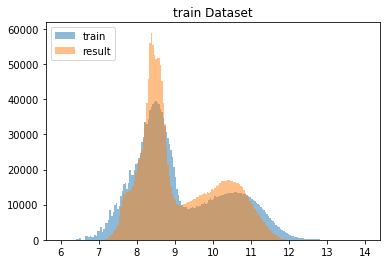

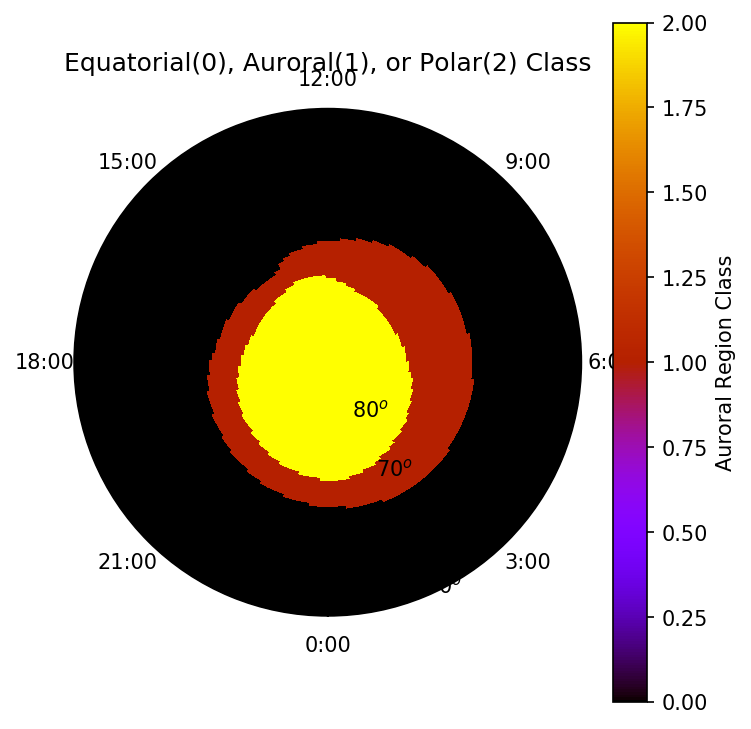

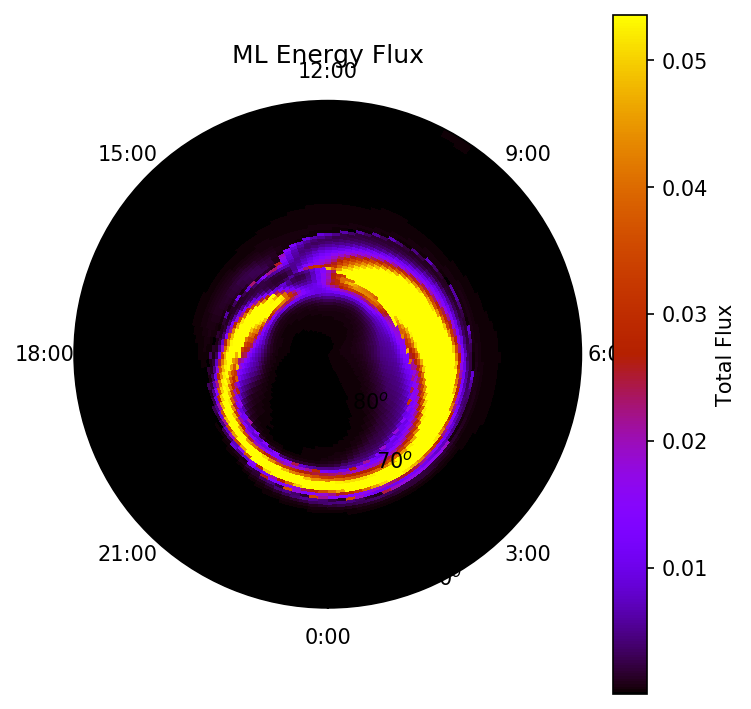

2010-09-20 07:41:00
Correction Applied
Correction Applied
Correction Applied


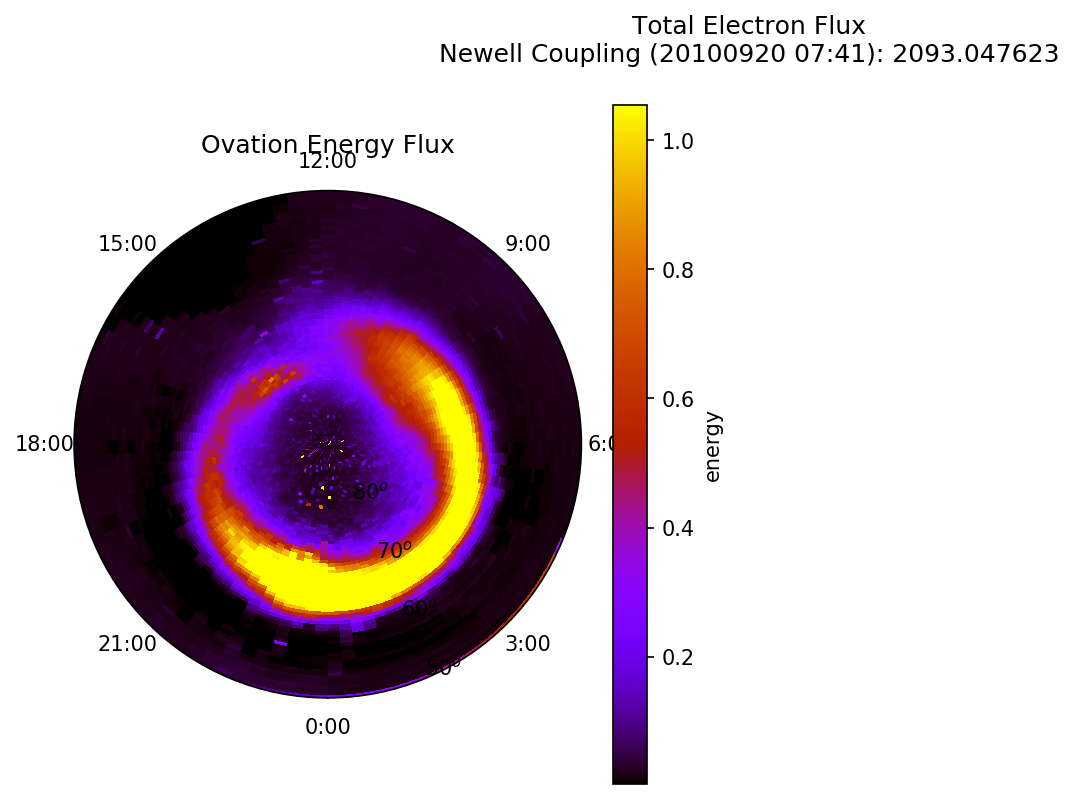

In [27]:
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plots(model, X, y_train_log1, y_train_aurora_type_encoded, X_test, y_val_log1, y_val_aurora_type_encoded,)

time_index = 40880
datetime = X_val.index[time_index]
X_model_in = X_val.values[time_index,:148]
scaler_X_all = scaler_X.fit(X_train.values[:,:148])
compare_ovation(model, datetime, X_model_in, scaler_X_all)

Epoch 1/101


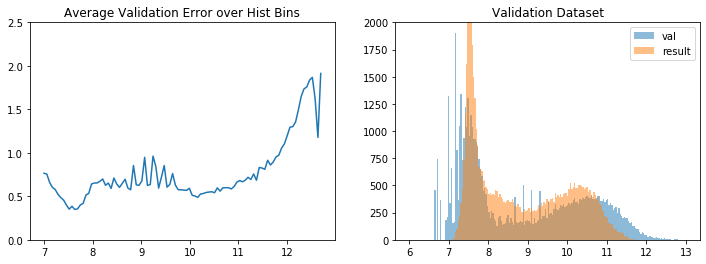

Hist_avg_error: 0.765417, Hist_avg_error_regions: 0.500185908145457, 0.6798375773232397, 0.8736067602026621, Hist_avg_right_tail: 1.4279464139441007
MSE: 0.6504125883149019, MAE: 0.604111036844662, Accuracy: 97.64354283644268
Epoch: 0
57/57 - 7s - loss: 0.1871 - val_loss: 0.2928
Epoch 2/101


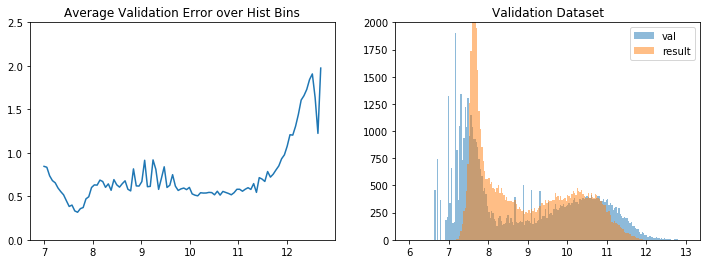

Hist_avg_error: 0.735790, Hist_avg_error_regions: 0.5310097219700416, 0.6606519015674748, 0.8231622171422439, Hist_avg_right_tail: 1.3747439279029354
MSE: 0.6425424101000319, MAE: 0.601080728271937, Accuracy: 97.46241622894404
Epoch: 1
57/57 - 7s - loss: 0.1859 - val_loss: 0.2977
Epoch 3/101


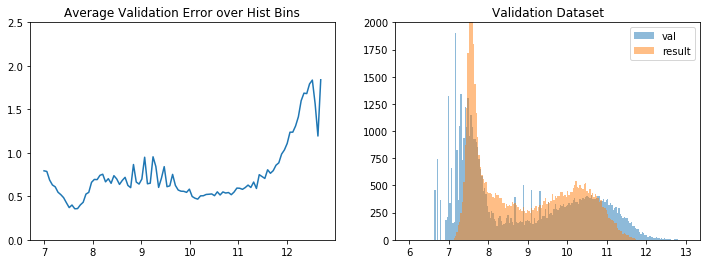

Hist_avg_error: 0.745768, Hist_avg_error_regions: 0.5204170632069232, 0.708660899624534, 0.8226029235605952, Hist_avg_right_tail: 1.3680880394457136
MSE: 0.6490783871915725, MAE: 0.6001988419094886, Accuracy: 97.63086397391777
Epoch: 2
57/57 - 7s - loss: 0.1862 - val_loss: 0.2959
Epoch 4/101


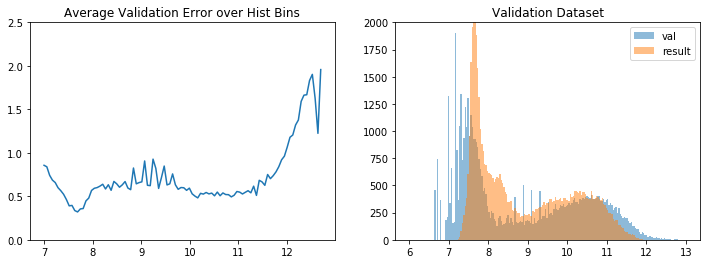

Hist_avg_error: 0.726791, Hist_avg_error_regions: 0.5335193784150138, 0.6549089814546953, 0.809662569081675, Hist_avg_right_tail: 1.3594026730028386
MSE: 0.6350807400717438, MAE: 0.5971861393667489, Accuracy: 97.51313167904365
Epoch: 3
57/57 - 7s - loss: 0.1835 - val_loss: 0.2957
Epoch 5/101


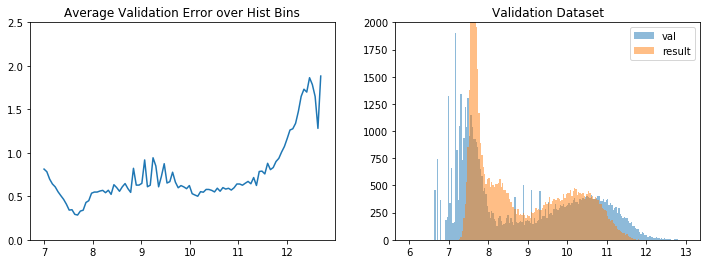

Hist_avg_error: 0.746264, Hist_avg_error_regions: 0.49026178223570926, 0.6281853451689652, 0.8657213748535421, Hist_avg_right_tail: 1.410205667288066
MSE: 0.6310192622601745, MAE: 0.5945862342346341, Accuracy: 97.53667813801847
Epoch: 4
57/57 - 7s - loss: 0.1843 - val_loss: 0.2934
Epoch 6/101


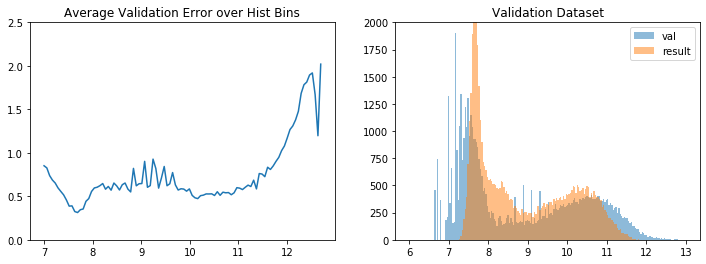

Hist_avg_error: 0.747745, Hist_avg_error_regions: 0.5276118941637978, 0.6455781461674568, 0.8507324406819102, Hist_avg_right_tail: 1.443120148516519
MSE: 0.6416363302126974, MAE: 0.6010559096988598, Accuracy: 97.24325303387067
Epoch: 5
57/57 - 7s - loss: 0.1845 - val_loss: 0.3075
Epoch 7/101


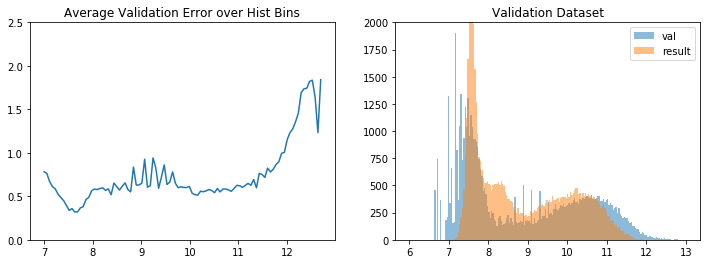

Hist_avg_error: 0.741353, Hist_avg_error_regions: 0.48890191517390014, 0.6388082041238525, 0.8532649762503647, Hist_avg_right_tail: 1.398223402543527
MSE: 0.6272833594009976, MAE: 0.5894598251969377, Accuracy: 97.44611483426915
Epoch: 6
57/57 - 7s - loss: 0.1875 - val_loss: 0.2903
Epoch 8/101


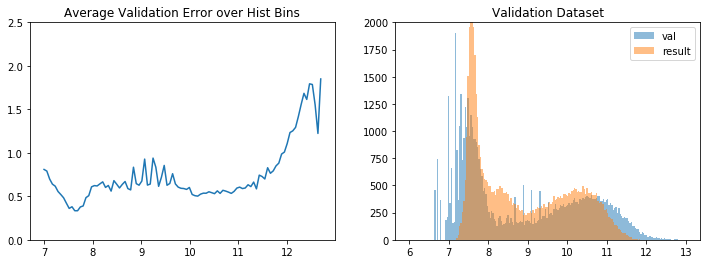

Hist_avg_error: 0.737621, Hist_avg_error_regions: 0.5122167332514088, 0.6638482255338707, 0.8300076557641329, Hist_avg_right_tail: 1.3579706122139172
MSE: 0.6361121611156512, MAE: 0.5972494253666006, Accuracy: 97.34468393406992
Epoch: 7
57/57 - 7s - loss: 0.1819 - val_loss: 0.3049
Epoch 9/101


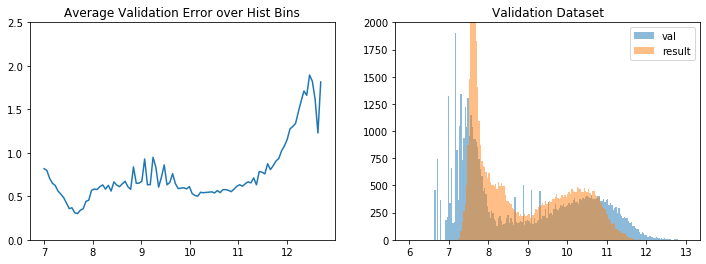

Hist_avg_error: 0.749680, Hist_avg_error_regions: 0.5044365114401747, 0.6562297738808782, 0.8557839639122232, Hist_avg_right_tail: 1.401420536247791
MSE: 0.6406182034319802, MAE: 0.600120119442382, Accuracy: 97.45698243071907
Epoch: 8
57/57 - 7s - loss: 0.1817 - val_loss: 0.2999
Epoch 10/101


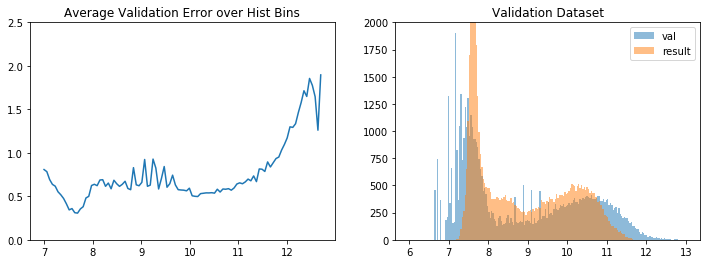

Hist_avg_error: 0.755070, Hist_avg_error_regions: 0.5021400478764815, 0.6680640597063079, 0.8605285656773064, Hist_avg_right_tail: 1.408707083142465
MSE: 0.642857817745659, MAE: 0.6007766806096176, Accuracy: 97.56384712914327
Epoch: 9
57/57 - 7s - loss: 0.1827 - val_loss: 0.2973
Epoch 11/101


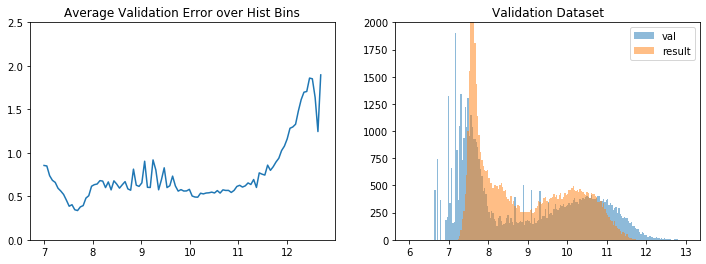

Hist_avg_error: 0.750860, Hist_avg_error_regions: 0.5398502071026008, 0.6601073213154556, 0.8465378625688872, Hist_avg_right_tail: 1.4109173653642755
MSE: 0.6530987458976871, MAE: 0.6104375305152354, Accuracy: 97.66890056149248
Epoch: 10
57/57 - 7s - loss: 0.1790 - val_loss: 0.2957
Epoch 12/101
57/57 - 5s - loss: 0.1820 - val_loss: 0.2839
Epoch 13/101
57/57 - 5s - loss: 0.1789 - val_loss: 0.2963
Epoch 14/101
57/57 - 5s - loss: 0.1805 - val_loss: 0.2907
Epoch 15/101
57/57 - 5s - loss: 0.1761 - val_loss: 0.2930
Epoch 16/101
57/57 - 5s - loss: 0.1786 - val_loss: 0.2888
Epoch 17/101
57/57 - 5s - loss: 0.1757 - val_loss: 0.3033
Epoch 18/101
57/57 - 5s - loss: 0.1772 - val_loss: 0.3018
Epoch 19/101
57/57 - 5s - loss: 0.1756 - val_loss: 0.3100
Epoch 20/101
57/57 - 5s - loss: 0.1782 - val_loss: 0.2940
Epoch 21/101


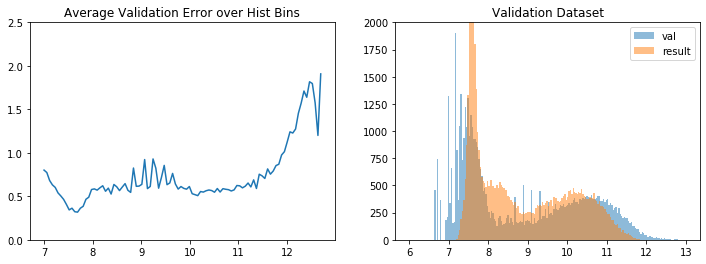

Hist_avg_error: 0.734127, Hist_avg_error_regions: 0.49804554584405514, 0.634952271044946, 0.8401720485871569, Hist_avg_right_tail: 1.3675331921691178
MSE: 0.6287668397516252, MAE: 0.5912088831299186, Accuracy: 97.68701322224234
Epoch: 20
57/57 - 7s - loss: 0.1745 - val_loss: 0.2897
Epoch 22/101
57/57 - 5s - loss: 0.1741 - val_loss: 0.2951
Epoch 23/101
57/57 - 5s - loss: 0.1722 - val_loss: 0.3165
Epoch 24/101
57/57 - 5s - loss: 0.1803 - val_loss: 0.2930
Epoch 25/101
57/57 - 5s - loss: 0.1709 - val_loss: 0.3126
Epoch 26/101
57/57 - 5s - loss: 0.1779 - val_loss: 0.2971
Epoch 27/101
57/57 - 5s - loss: 0.1722 - val_loss: 0.3090
Epoch 28/101
57/57 - 5s - loss: 0.1717 - val_loss: 0.2960
Epoch 29/101
57/57 - 5s - loss: 0.1715 - val_loss: 0.2942
Epoch 30/101
57/57 - 5s - loss: 0.1692 - val_loss: 0.2982
Epoch 31/101


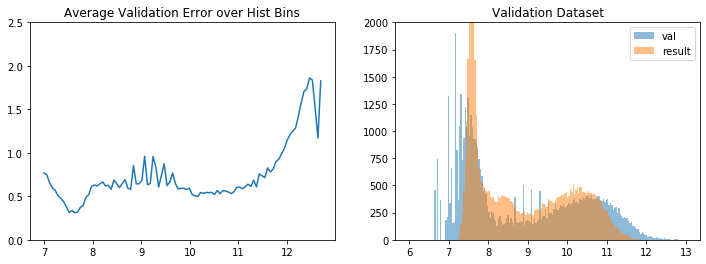

Hist_avg_error: 0.739557, Hist_avg_error_regions: 0.4797439786276947, 0.6728553197135841, 0.8382789901519273, Hist_avg_right_tail: 1.3767659872016618
MSE: 0.6259872516135264, MAE: 0.5841624756919105, Accuracy: 97.53124433979352
Epoch: 30
57/57 - 7s - loss: 0.1701 - val_loss: 0.2948
Epoch 32/101
57/57 - 6s - loss: 0.1695 - val_loss: 0.3035
Epoch 33/101
57/57 - 5s - loss: 0.1701 - val_loss: 0.3003
Epoch 34/101
57/57 - 5s - loss: 0.1683 - val_loss: 0.2926
Epoch 35/101
57/57 - 6s - loss: 0.1696 - val_loss: 0.2985
Epoch 36/101
57/57 - 5s - loss: 0.1652 - val_loss: 0.2991
Epoch 37/101
57/57 - 5s - loss: 0.1668 - val_loss: 0.3063
Epoch 38/101
57/57 - 5s - loss: 0.1683 - val_loss: 0.2986
Epoch 39/101
57/57 - 5s - loss: 0.1676 - val_loss: 0.2987
Epoch 40/101
57/57 - 6s - loss: 0.1649 - val_loss: 0.3025
Epoch 41/101


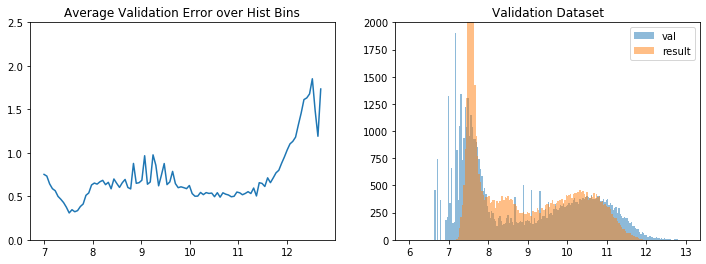

Hist_avg_error: 0.712630, Hist_avg_error_regions: 0.47910121502269987, 0.6861806397992487, 0.787167422178442, Hist_avg_right_tail: 1.2830262266782868
MSE: 0.6189748478705084, MAE: 0.5730602545717876, Accuracy: 97.5602245969933
Epoch: 40
57/57 - 7s - loss: 0.1647 - val_loss: 0.2966
Epoch 42/101
57/57 - 6s - loss: 0.1670 - val_loss: 0.3056
Epoch 43/101
57/57 - 5s - loss: 0.1634 - val_loss: 0.2983
Epoch 44/101
57/57 - 6s - loss: 0.1630 - val_loss: 0.3006
Epoch 45/101
57/57 - 6s - loss: 0.1633 - val_loss: 0.3046
Epoch 46/101
57/57 - 5s - loss: 0.1657 - val_loss: 0.3051
Epoch 47/101
57/57 - 5s - loss: 0.1648 - val_loss: 0.3011
Epoch 48/101
57/57 - 5s - loss: 0.1594 - val_loss: 0.3149
Epoch 49/101
57/57 - 5s - loss: 0.1617 - val_loss: 0.3066
Epoch 50/101
57/57 - 5s - loss: 0.1628 - val_loss: 0.3133
Epoch 51/101


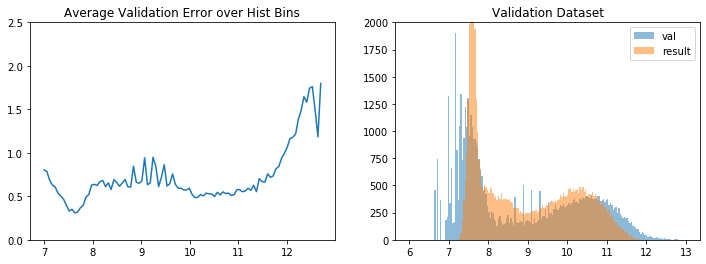

Hist_avg_error: 0.722052, Hist_avg_error_regions: 0.4984608478245487, 0.6795790508398387, 0.8006836045200512, Hist_avg_right_tail: 1.3111448182557632
MSE: 0.6282613311961311, MAE: 0.5844226573146122, Accuracy: 97.50950914689368
Epoch: 50
57/57 - 7s - loss: 0.1616 - val_loss: 0.3035
Epoch 52/101
57/57 - 6s - loss: 0.1605 - val_loss: 0.3070
Epoch 53/101
57/57 - 5s - loss: 0.1602 - val_loss: 0.3102
Epoch 54/101
57/57 - 5s - loss: 0.1590 - val_loss: 0.2969
Epoch 55/101
57/57 - 5s - loss: 0.1597 - val_loss: 0.3109
Epoch 56/101
57/57 - 5s - loss: 0.1573 - val_loss: 0.2976
Epoch 57/101
57/57 - 6s - loss: 0.1554 - val_loss: 0.3046
Epoch 58/101
57/57 - 5s - loss: 0.1572 - val_loss: 0.2988
Epoch 59/101
57/57 - 5s - loss: 0.1584 - val_loss: 0.3039
Epoch 60/101
57/57 - 5s - loss: 0.1569 - val_loss: 0.3095
Epoch 61/101


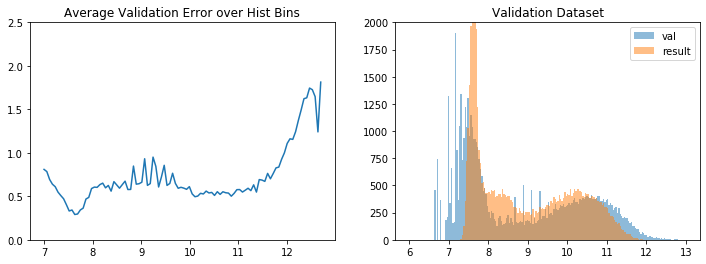

Hist_avg_error: 0.721849, Hist_avg_error_regions: 0.49421000448730795, 0.6602731545583153, 0.8096732811163752, Hist_avg_right_tail: 1.326220848283983
MSE: 0.6236237889552473, MAE: 0.5834801534933671, Accuracy: 97.57833725774316
Epoch: 60
57/57 - 7s - loss: 0.1559 - val_loss: 0.3068
Epoch 62/101
57/57 - 5s - loss: 0.1550 - val_loss: 0.3079
Epoch 63/101
57/57 - 5s - loss: 0.1546 - val_loss: 0.3039
Epoch 64/101
57/57 - 5s - loss: 0.1571 - val_loss: 0.3073
Epoch 65/101
57/57 - 6s - loss: 0.1589 - val_loss: 0.3017
Epoch 66/101
57/57 - 6s - loss: 0.1540 - val_loss: 0.3013
Epoch 67/101
57/57 - 6s - loss: 0.1518 - val_loss: 0.3125
Epoch 68/101
57/57 - 6s - loss: 0.1551 - val_loss: 0.3059
Epoch 69/101
57/57 - 6s - loss: 0.1543 - val_loss: 0.3198
Epoch 70/101
57/57 - 6s - loss: 0.1506 - val_loss: 0.3103
Epoch 71/101


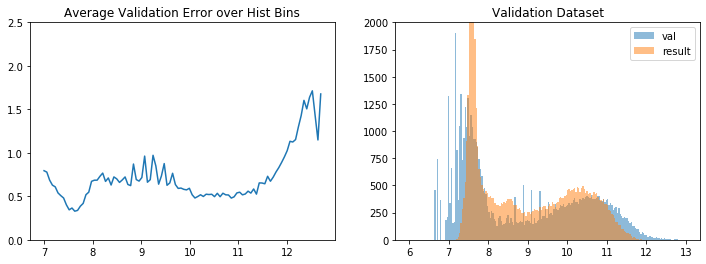

Hist_avg_error: 0.718165, Hist_avg_error_regions: 0.5078698986392705, 0.7178161646299763, 0.7753422723735224, Hist_avg_right_tail: 1.2543600167632207
MSE: 0.6428328039135326, MAE: 0.5887105121987658, Accuracy: 97.6797681579424
Epoch: 70
57/57 - 7s - loss: 0.1518 - val_loss: 0.3117
Epoch 72/101
57/57 - 6s - loss: 0.1517 - val_loss: 0.3154
Epoch 73/101
57/57 - 6s - loss: 0.1539 - val_loss: 0.3129
Epoch 74/101
57/57 - 6s - loss: 0.1509 - val_loss: 0.3101
Epoch 75/101
57/57 - 6s - loss: 0.1490 - val_loss: 0.3070
Epoch 76/101
57/57 - 6s - loss: 0.1484 - val_loss: 0.3047
Epoch 77/101
57/57 - 6s - loss: 0.1555 - val_loss: 0.3011
Epoch 78/101
57/57 - 6s - loss: 0.1495 - val_loss: 0.3279
Epoch 79/101
57/57 - 6s - loss: 0.1510 - val_loss: 0.3093
Epoch 80/101
57/57 - 6s - loss: 0.1500 - val_loss: 0.3202
Epoch 81/101


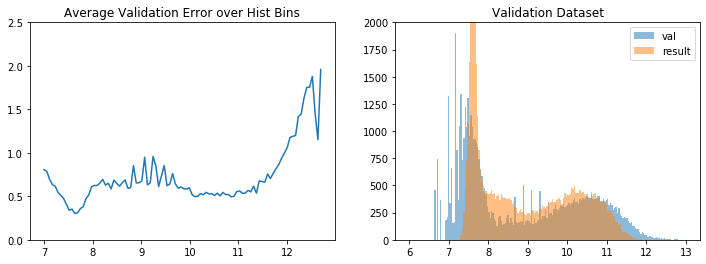

Hist_avg_error: 0.724618, Hist_avg_error_regions: 0.4997633959564307, 0.6783069526772352, 0.8052180543537181, Hist_avg_right_tail: 1.334157836512677
MSE: 0.6315502370409322, MAE: 0.5844494049335494, Accuracy: 97.64535410251766
Epoch: 80
57/57 - 7s - loss: 0.1492 - val_loss: 0.3093
Epoch 82/101
57/57 - 6s - loss: 0.1471 - val_loss: 0.3041
Epoch 83/101
57/57 - 6s - loss: 0.1461 - val_loss: 0.3277
Epoch 84/101
57/57 - 6s - loss: 0.1479 - val_loss: 0.3143
Epoch 85/101
57/57 - 6s - loss: 0.1454 - val_loss: 0.3087
Epoch 86/101
57/57 - 6s - loss: 0.1552 - val_loss: 0.3074
Epoch 87/101
57/57 - 6s - loss: 0.1463 - val_loss: 0.3121
Epoch 88/101
57/57 - 6s - loss: 0.1456 - val_loss: 0.3184
Epoch 89/101
57/57 - 6s - loss: 0.1433 - val_loss: 0.3171
Epoch 90/101
57/57 - 6s - loss: 0.1452 - val_loss: 0.3174
Epoch 91/101


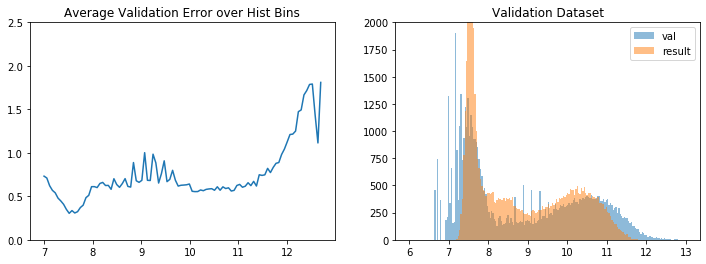

Hist_avg_error: 0.746467, Hist_avg_error_regions: 0.4613601559826809, 0.6852180391827193, 0.8497367347083972, Hist_avg_right_tail: 1.3456153385167118
MSE: 0.6406604228828154, MAE: 0.5886516961581189, Accuracy: 97.4533598985691
Epoch: 90
57/57 - 7s - loss: 0.1483 - val_loss: 0.3263
Epoch 92/101
57/57 - 6s - loss: 0.1463 - val_loss: 0.3250
Epoch 93/101
57/57 - 6s - loss: 0.1457 - val_loss: 0.3136
Epoch 94/101
57/57 - 6s - loss: 0.1452 - val_loss: 0.3087
Epoch 95/101
57/57 - 6s - loss: 0.1447 - val_loss: 0.3216
Epoch 96/101
57/57 - 6s - loss: 0.1453 - val_loss: 0.3112
Epoch 97/101
57/57 - 6s - loss: 0.1428 - val_loss: 0.3112
Epoch 98/101
57/57 - 6s - loss: 0.1411 - val_loss: 0.3445
Epoch 99/101
57/57 - 6s - loss: 0.1455 - val_loss: 0.3199
Epoch 100/101
57/57 - 6s - loss: 0.1401 - val_loss: 0.3205
Epoch 101/101


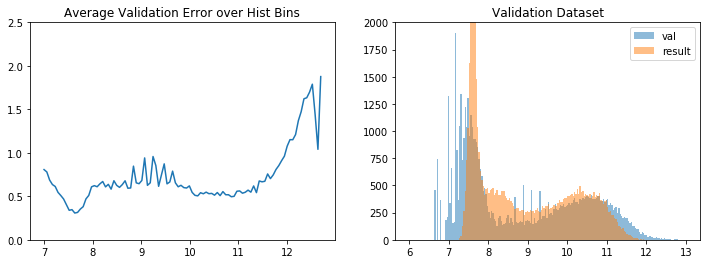

Hist_avg_error: 0.719280, Hist_avg_error_regions: 0.49769251395997155, 0.6706905923388409, 0.7999604672852162, Hist_avg_right_tail: 1.2977827994474236
MSE: 0.6299897847832584, MAE: 0.5852118164231475, Accuracy: 97.66527802934252
Epoch: 100
57/57 - 7s - loss: 0.1479 - val_loss: 0.3109


In [28]:
history = model.fit(X[:,:148], 
                    np.concatenate((y_train_aurora_type_encoded, y_train_log),axis=1), 
                    validation_data=(
                        X_test[:,:148], 
                        np.concatenate((y_val_aurora_type_encoded, y_val_log),axis=1),                                    ),
                    batch_size=32768,epochs=101,verbose=2,
                   callbacks=[metrics_callback])#

In [29]:
model.save('all_years_relu_dropout2.model')
model.save_weights('all_years_relu_dropout2.weights')
model.load_weights('all_years_relu_dropout2.weights')

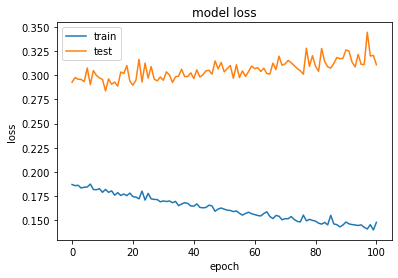

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:270: RuntimeWarning: invalid value encountered in true_divide


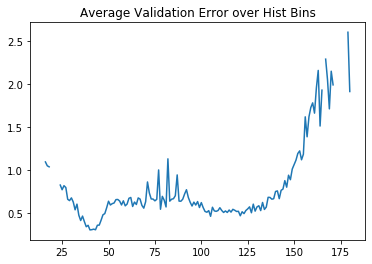

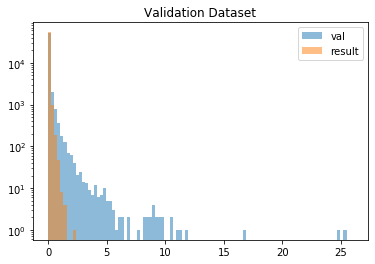

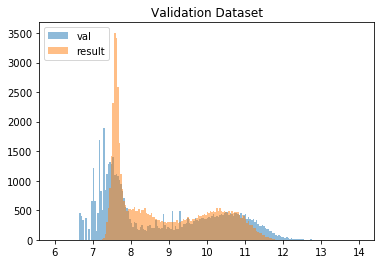

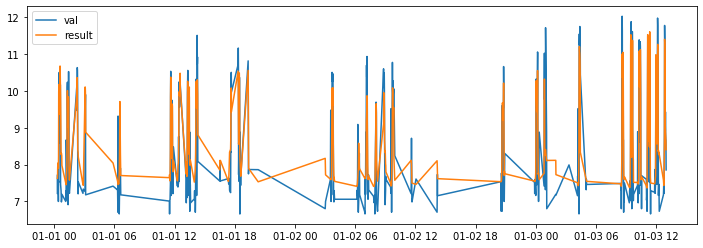

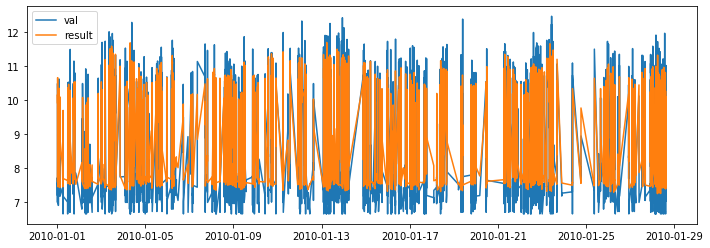

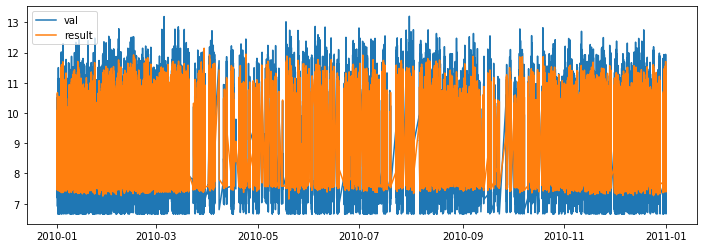

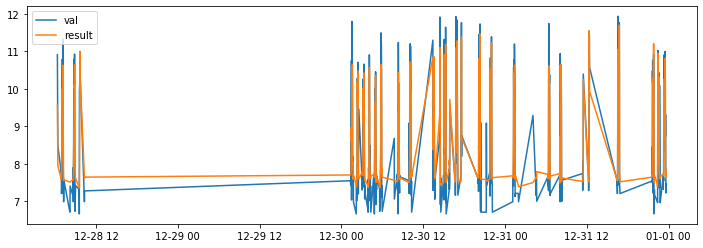

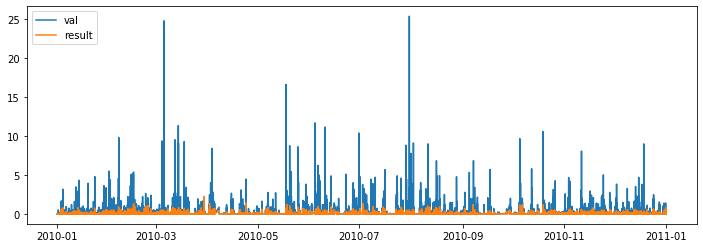

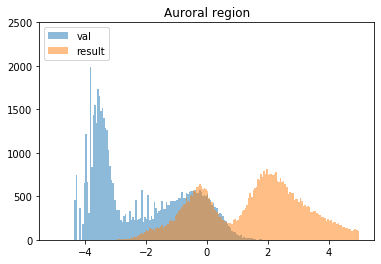

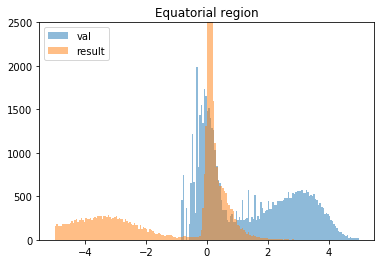

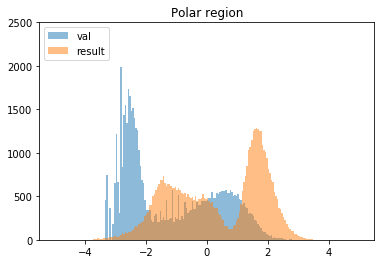

Region 0 MAE: 0.5717602540990765
Region 1 MAE: 0.5110082819751667
Region 2 MAE: 0.747897806140447


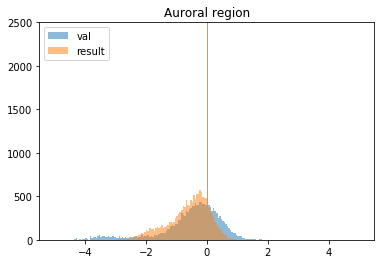

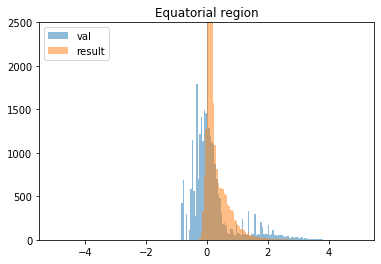

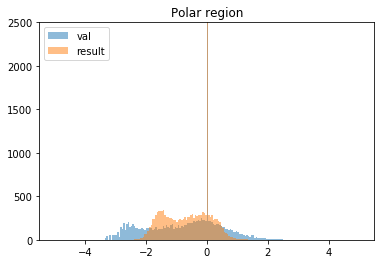

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:397: RuntimeWarning: invalid value encountered in true_divide


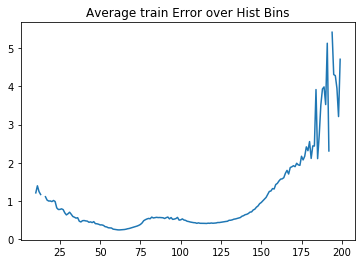

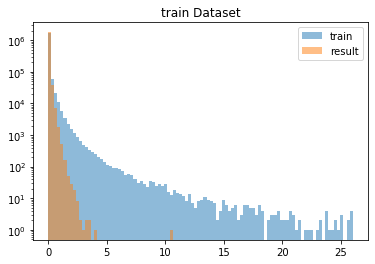

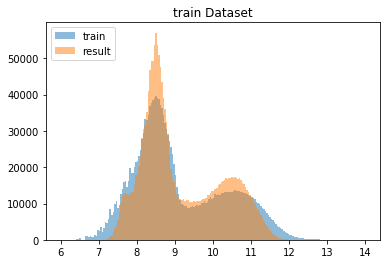

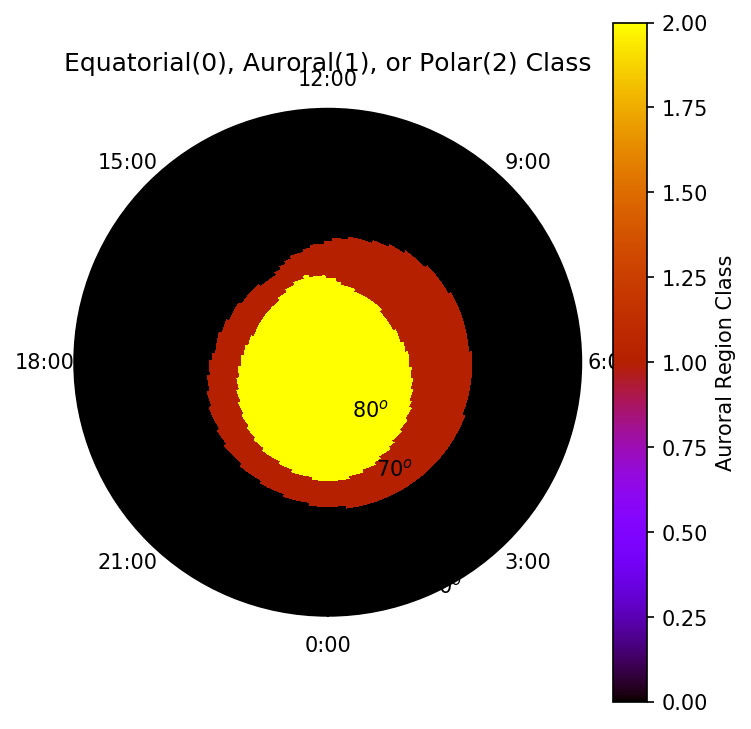

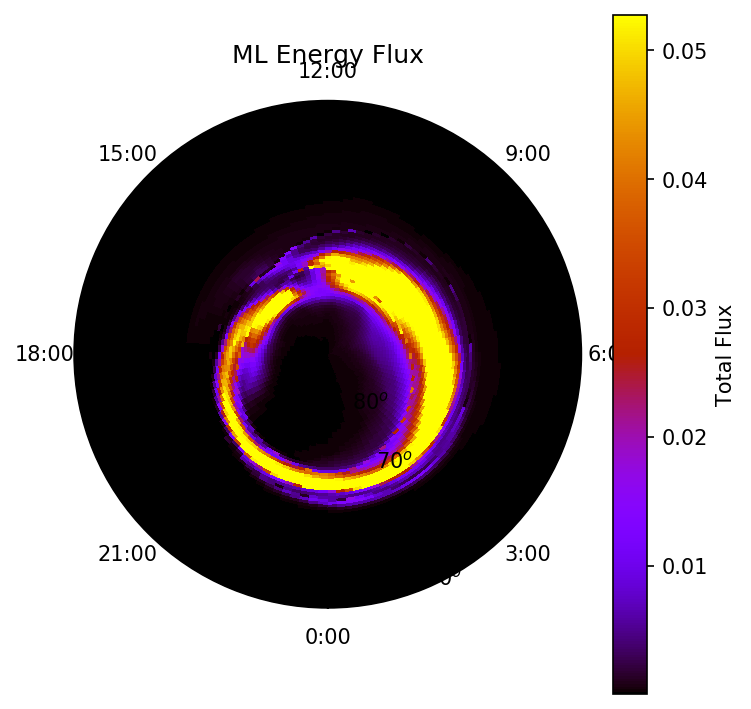

2010-09-20 07:41:00
Correction Applied
Correction Applied
Correction Applied


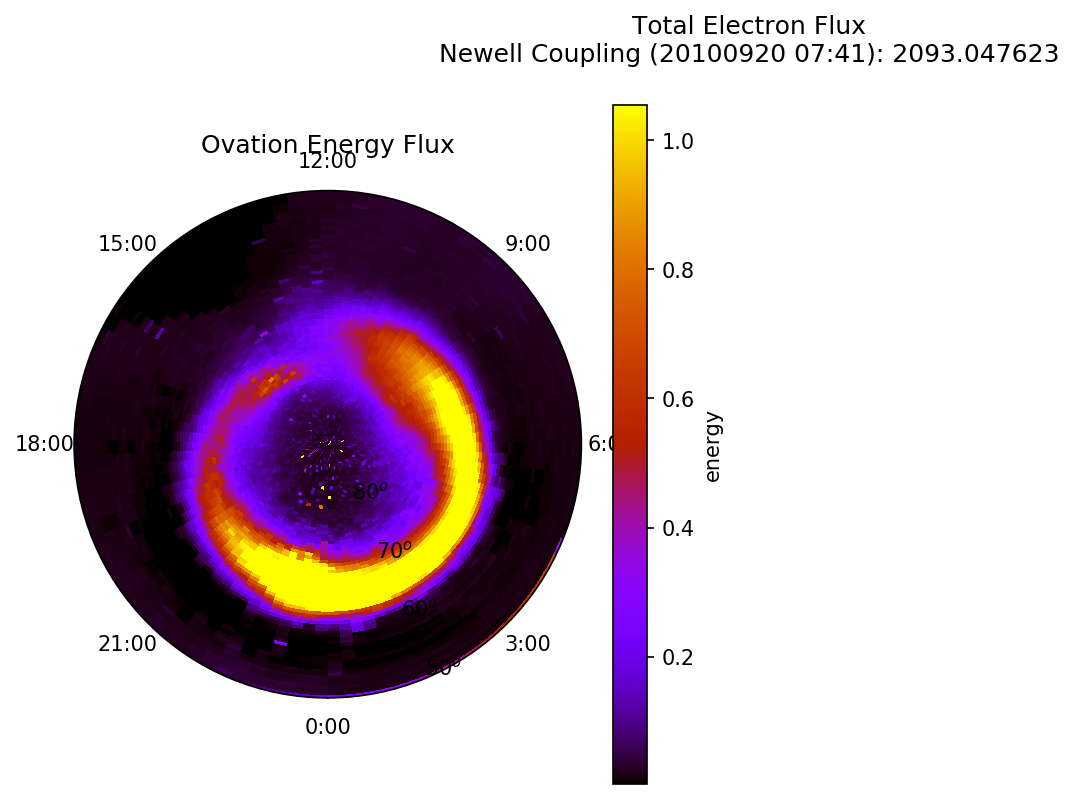

In [30]:
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plots(model, X, y_train_log1, y_train_aurora_type_encoded, X_test, y_val_log1, y_val_aurora_type_encoded,)

time_index = 40880
datetime = X_val.index[time_index]
X_model_in = X_val.values[time_index,:148]
scaler_X_all = scaler_X.fit(X_train.values[:,:148])
compare_ovation(model, datetime, X_model_in, scaler_X_all)